## CNN-LSTM Model for Anomaly Detection for Curiosity Rover

This notebook I train a CNN-LSTM model for anomaly detection using telemetry data from NASA’s Mars Science Laboratory (MSL) mission. The data and labels come from the anomaly detection benchmark published by Hundman et al. (2018), which includes both MSL and SMAP spacecraft datasets. In this work, I only use the MSL portion of the dataset.

The time series are split into fixed-size sliding windows and labeled based on whether they overlap with known anomaly intervals. The model combines convolutional layers to extract local patterns in the signal with an LSTM layer that captures how those patterns evolve over time. I evaluate the model on each telemetry channel and also report overall performance using precision, recall, F1-score, and AUC.

> **All credit for the dataset goes to:**  
> **Hundman, K., Constantinou, V., Laporte, C., Colwell, I., & Soderstrom, T. (2018).**  
> *Detecting Spacecraft Anomalies Using LSTMs and Nonparametric Dynamic Thresholding.*  
> KDD. [https://doi.org/10.1145/3219819.3219845](https://doi.org/10.1145/3219819.3219845)


Mounted at /content/drive
 Extracting the data...
 Extracting labels CSV...
 Flattening 'data' folder into /content/data...
 Data preparation complete.
   • Telemetry files → /content/data
   • Labels CSV      → /content/labeled_anomalies.csv
 Found 20 channels with anomalies.

▶ Channel M-1 – intervals: 1
   • Windows: 2110, Anomalies: 1099 (52.09%)
   • Class weights: {0: np.float64(1.0430790960451977), 1: np.float64(0.9603381014304291)}


Model: "CNN_LSTM_Hybrid"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_timeseries (InputLayer)   │ (None, 100, 55)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv1D)                  │ (None, 100, 64)        │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn1 (BatchNormalization)        │ (None, 100, 64)        │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling1D)            │ (None, 50, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop1 (Dropout)                 │ (None, 50, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv1D)                  │ (None, 50, 128)        │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn2 (BatchNormalization)        │ (None, 50, 128)        │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling1D)            │ (None, 25, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop2 (Dropout)                 │ (None, 25, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv1D)                  │ (None, 25, 256)        │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn3 (BatchNormalization)        │ (None, 25, 256)        │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool3 (MaxPooling1D)            │ (None, 12, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop3 (Dropout)                 │ (None, 12, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        82,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop_lstm (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop_dense (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 249,729 (975.50 KB)

 Trainable params: 248,833 (972.00 KB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7038 - auc: 0.7518 - loss: 0.0683 - prc: 0.7801 - precision: 0.7981 - recall: 0.5510
Epoch 1: val_prc improved from -inf to 0.94931, saving model to models/M-1_best.h5


47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 43ms/step - accuracy: 0.7050 - auc: 0.7536 - loss: 0.0679 - prc: 0.7822 - precision: 0.8003 - recall: 0.5522 - val_accuracy: 0.4778 - val_auc: 0.9315 - val_loss: 0.0748 - val_prc: 0.9493 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8557 - auc: 0.9237 - loss: 0.0339 - prc: 0.9390 - precision: 0.9631 - recall: 0.7346
Epoch 2: val_prc did not improve from 0.94931
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8561 - auc: 0.9241 - loss: 0.0338 - prc: 0.9394 - precision: 0.9634 - recall: 0.7354 - val_accuracy: 0.4778 - val_auc: 0.8180 - val_loss: 0.1479 - val_prc: 0.8529 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9112 - auc: 0.9685 - loss: 0.0214 - prc: 0.9752 - precision: 0.9808 - recall: 0.8367
Epoch 3: val_prc did not improve from 0.94931
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9114 - auc: 0

Model: "CNN_LSTM_Hybrid"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_timeseries (InputLayer)   │ (None, 100, 55)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv1D)                  │ (None, 100, 64)        │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn1 (BatchNormalization)        │ (None, 100, 64)        │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling1D)            │ (None, 50, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop1 (Dropout)                 │ (None, 50, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv1D)                  │ (None, 50, 128)        │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn2 (BatchNormalization)        │ (None, 50, 128)        │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling1D)            │ (None, 25, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop2 (Dropout)                 │ (None, 25, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv1D)                  │ (None, 25, 256)        │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn3 (BatchNormalization)        │ (None, 25, 256)        │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool3 (MaxPooling1D)            │ (None, 12, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop3 (Dropout)                 │ (None, 12, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        82,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop_lstm (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop_dense (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 249,729 (975.50 KB)

 Trainable params: 248,833 (972.00 KB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5123 - auc: 0.5558 - loss: 0.0828 - prc: 0.5893 - precision: 0.5782 - recall: 0.2606
Epoch 1: val_prc improved from -inf to 0.71790, saving model to models/M-2_best.h5


47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.5129 - auc: 0.5570 - loss: 0.0826 - prc: 0.5904 - precision: 0.5799 - recall: 0.2606 - val_accuracy: 0.4778 - val_auc: 0.6710 - val_loss: 0.0718 - val_prc: 0.7179 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/50
45/47 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6294 - auc: 0.7436 - loss: 0.0625 - prc: 0.7717 - precision: 0.8531 - recall: 0.3407
Epoch 2: val_prc improved from 0.71790 to 0.91625, saving model to models/M-2_best.h5


47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.6344 - auc: 0.7491 - loss: 0.0618 - prc: 0.7774 - precision: 0.8575 - recall: 0.3495 - val_accuracy: 0.4778 - val_auc: 0.8774 - val_loss: 0.0710 - val_prc: 0.9162 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/50
44/47 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8724 - auc: 0.9287 - loss: 0.0349 - prc: 0.9512 - precision: 0.9634 - recall: 0.7835
Epoch 3: val_prc improved from 0.91625 to 0.94125, saving model to models/M-2_best.h5


47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8748 - auc: 0.9306 - loss: 0.0343 - prc: 0.9525 - precision: 0.9641 - recall: 0.7878 - val_accuracy: 0.4778 - val_auc: 0.9314 - val_loss: 0.0832 - val_prc: 0.9413 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/50
46/47 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9513 - auc: 0.9888 - loss: 0.0130 - prc: 0.9920 - precision: 0.9882 - recall: 0.9171
Epoch 4: val_prc improved from 0.94125 to 0.97454, saving model to models/M-2_best.h5


47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9517 - auc: 0.9889 - loss: 0.0129 - prc: 0.9920 - precision: 0.9883 - recall: 0.9178 - val_accuracy: 0.4778 - val_auc: 0.9703 - val_loss: 0.0912 - val_prc: 0.9745 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/50
45/47 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9640 - auc: 0.9895 - loss: 0.0108 - prc: 0.9930 - precision: 0.9974 - recall: 0.9333
Epoch 5: val_prc did not improve from 0.97454
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9643 - auc: 0.9898 - loss: 0.0107 - prc: 0.9931 - precision: 0.9973 - recall: 0.9342 - val_accuracy: 0.4778 - val_auc: 0.9498 - val_loss: 0.1229 - val_prc: 0.9602 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9677 - auc: 0.9930 - loss: 0.0097 - prc: 0.9947 - precision: 0.9897 - recall: 0.9479
Epoch 6: val_prc improved from 0.97454 to 0.99058, saving model to models/M-2_best.h5


47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9678 - auc: 0.9931 - loss: 0.0096 - prc: 0.9947 - precision: 0.9897 - recall: 0.9481 - val_accuracy: 0.5032 - val_auc: 0.9887 - val_loss: 0.1074 - val_prc: 0.9906 - val_precision: 1.0000 - val_recall: 0.0485
Epoch 7/50
44/47 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9787 - auc: 0.9969 - loss: 0.0056 - prc: 0.9978 - precision: 0.9975 - recall: 0.9619
Epoch 7: val_prc did not improve from 0.99058
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9788 - auc: 0.9969 - loss: 0.0056 - prc: 0.9978 - precision: 0.9973 - recall: 0.9622 - val_accuracy: 0.5127 - val_auc: 0.9877 - val_loss: 0.0935 - val_prc: 0.9891 - val_precision: 1.0000 - val_recall: 0.0667
Epoch 8/50
43/47 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9853 - auc: 0.9982 - loss: 0.0050 - prc: 0.9988 - precision: 0.9981 - recall: 0.9736
Epoch 8: val_prc improved from 0.99058 to 0.99942, saving model to models/M-2_best.h5


47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9853 - auc: 0.9981 - loss: 0.0050 - prc: 0.9987 - precision: 0.9979 - recall: 0.9739 - val_accuracy: 0.5253 - val_auc: 0.9994 - val_loss: 0.0598 - val_prc: 0.9994 - val_precision: 1.0000 - val_recall: 0.0909
Epoch 9/50
43/47 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9861 - auc: 0.9993 - loss: 0.0034 - prc: 0.9993 - precision: 0.9963 - recall: 0.9770
Epoch 9: val_prc improved from 0.99942 to 1.00000, saving model to models/M-2_best.h5


47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9862 - auc: 0.9993 - loss: 0.0034 - prc: 0.9993 - precision: 0.9963 - recall: 0.9771 - val_accuracy: 0.8418 - val_auc: 1.0000 - val_loss: 0.0210 - val_prc: 1.0000 - val_precision: 1.0000 - val_recall: 0.6970
Epoch 10/50
45/47 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9815 - auc: 0.9963 - loss: 0.0068 - prc: 0.9972 - precision: 0.9914 - recall: 0.9731
Epoch 10: val_prc did not improve from 1.00000
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9813 - auc: 0.9963 - loss: 0.0069 - prc: 0.9972 - precision: 0.9913 - recall: 0.9727 - val_accuracy: 0.5443 - val_auc: 0.9979 - val_loss: 0.1183 - val_prc: 0.9982 - val_precision: 1.0000 - val_recall: 0.1273
Epoch 11/50
46/47 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9781 - auc: 0.9977 - loss: 0.0056 - prc: 0.9982 - precision: 0.9946 - recall: 0.9631
Epoch 11: val_prc did not improve from 1.00000
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9783 - auc: 0.9977 - loss:

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9926 - auc: 0.9997 - loss: 0.0024 - prc: 0.9997 - precision: 0.9960 - recall: 0.9896 - val_accuracy: 0.9905 - val_auc: 1.0000 - val_loss: 0.0020 - val_prc: 1.0000 - val_precision: 1.0000 - val_recall: 0.9818
Epoch 14/50
45/47 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9956 - auc: 0.9995 - loss: 0.0020 - prc: 0.9995 - precision: 0.9997 - recall: 0.9920
Epoch 14: val_prc did not improve from 1.00000
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9955 - auc: 0.9995 - loss: 0.0020 - prc: 0.9995 - precision: 0.9996 - recall: 0.9919 - val_accuracy: 0.9937 - val_auc: 1.0000 - val_loss: 9.6335e-04 - val_prc: 1.0000 - val_precision: 1.0000 - val_recall: 0.9879
Epoch 15/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9909 - auc: 0.9998 - loss: 0.0025 - prc: 0.9998 - precision: 0.9950 - recall: 0.9876
Epoch 15: val_prc did not improve from 1.00000
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9910 - auc: 0.9998 - l

Model: "CNN_LSTM_Hybrid"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_timeseries (InputLayer)   │ (None, 100, 55)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv1D)                  │ (None, 100, 64)        │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn1 (BatchNormalization)        │ (None, 100, 64)        │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling1D)            │ (None, 50, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop1 (Dropout)                 │ (None, 50, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv1D)                  │ (None, 50, 128)        │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn2 (BatchNormalization)        │ (None, 50, 128)        │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling1D)            │ (None, 25, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop2 (Dropout)                 │ (None, 25, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv1D)                  │ (None, 25, 256)        │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn3 (BatchNormalization)        │ (None, 25, 256)        │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool3 (MaxPooling1D)            │ (None, 12, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop3 (Dropout)                 │ (None, 12, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        82,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop_lstm (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop_dense (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 249,729 (975.50 KB)

 Trainable params: 248,833 (972.00 KB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7222 - auc: 0.7613 - loss: 0.0666 - prc: 0.2228 - precision: 0.0734 - recall: 0.5500
Epoch 1: val_prc improved from -inf to 1.00000, saving model to models/S-2_best.h5


19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.7286 - auc: 0.7675 - loss: 0.0657 - prc: 0.2257 - precision: 0.0762 - recall: 0.5558 - val_accuracy: 0.0323 - val_auc: 1.0000 - val_loss: 0.2340 - val_prc: 1.0000 - val_precision: 0.0323 - val_recall: 1.0000
Epoch 2/50
17/19 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9733 - auc: 0.9898 - loss: 0.0136 - prc: 0.7325 - precision: 0.5441 - recall: 0.9749
Epoch 2: val_prc did not improve from 1.00000
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9732 - auc: 0.9896 - loss: 0.0138 - prc: 0.7217 - precision: 0.5422 - recall: 0.9703 - val_accuracy: 0.0323 - val_auc: 0.9917 - val_loss: 0.9442 - val_prc: 0.6667 - val_precision: 0.0323 - val_recall: 1.0000
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9821 - auc: 0.9936 - loss: 0.0112 - prc: 0.8523 - precision: 0.6479 - recall: 0.9308
Epoch 3: val_prc did not improve from 1.00000
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9821 - auc: 0.9936 - loss: 0.0

Model: "CNN_LSTM_Hybrid"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_timeseries (InputLayer)   │ (None, 100, 55)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv1D)                  │ (None, 100, 64)        │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn1 (BatchNormalization)        │ (None, 100, 64)        │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling1D)            │ (None, 50, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop1 (Dropout)                 │ (None, 50, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv1D)                  │ (None, 50, 128)        │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn2 (BatchNormalization)        │ (None, 50, 128)        │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling1D)            │ (None, 25, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop2 (Dropout)                 │ (None, 25, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv1D)                  │ (None, 25, 256)        │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn3 (BatchNormalization)        │ (None, 25, 256)        │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool3 (MaxPooling1D)            │ (None, 12, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop3 (Dropout)                 │ (None, 12, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        82,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop_lstm (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop_dense (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 249,729 (975.50 KB)

 Trainable params: 248,833 (972.00 KB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7479 - auc: 0.5174 - loss: 0.0927 - prc: 0.1023 - precision: 0.1070 - recall: 0.2557
Epoch 1: val_prc improved from -inf to 0.12240, saving model to models/T-4_best.h5


48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - accuracy: 0.7491 - auc: 0.5179 - loss: 0.0926 - prc: 0.1022 - precision: 0.1071 - recall: 0.2549 - val_accuracy: 0.0767 - val_auc: 0.6734 - val_loss: 0.1986 - val_prc: 0.1224 - val_precision: 0.0767 - val_recall: 1.0000
Epoch 2/50
47/48 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7880 - auc: 0.6649 - loss: 0.0754 - prc: 0.1763 - precision: 0.1496 - recall: 0.3386
Epoch 2: val_prc improved from 0.12240 to 0.14509, saving model to models/T-4_best.h5


48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.7900 - auc: 0.6665 - loss: 0.0751 - prc: 0.1755 - precision: 0.1505 - recall: 0.3366 - val_accuracy: 0.0767 - val_auc: 0.7393 - val_loss: 0.2130 - val_prc: 0.1451 - val_precision: 0.0767 - val_recall: 1.0000
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8719 - auc: 0.8678 - loss: 0.0517 - prc: 0.3771 - precision: 0.3440 - recall: 0.5853
Epoch 3: val_prc improved from 0.14509 to 0.17693, saving model to models/T-4_best.h5


48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8726 - auc: 0.8683 - loss: 0.0516 - prc: 0.3788 - precision: 0.3453 - recall: 0.5859 - val_accuracy: 0.0767 - val_auc: 0.7990 - val_loss: 0.2839 - val_prc: 0.1769 - val_precision: 0.0767 - val_recall: 1.0000
Epoch 4/50
45/48 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9428 - auc: 0.9814 - loss: 0.0225 - prc: 0.8039 - precision: 0.6299 - recall: 0.8987
Epoch 4: val_prc improved from 0.17693 to 0.40060, saving model to models/T-4_best.h5


48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9446 - auc: 0.9820 - loss: 0.0221 - prc: 0.8110 - precision: 0.6376 - recall: 0.8979 - val_accuracy: 0.0767 - val_auc: 0.8756 - val_loss: 0.4492 - val_prc: 0.4006 - val_precision: 0.0767 - val_recall: 1.0000
Epoch 5/50
45/48 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9803 - auc: 0.9945 - loss: 0.0109 - prc: 0.9211 - precision: 0.8302 - recall: 0.9631
Epoch 5: val_prc did not improve from 0.40060
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9811 - auc: 0.9947 - loss: 0.0106 - prc: 0.9247 - precision: 0.8356 - recall: 0.9647 - val_accuracy: 0.0767 - val_auc: 0.8615 - val_loss: 0.5422 - val_prc: 0.3876 - val_precision: 0.0767 - val_recall: 1.0000
Epoch 6/50
45/48 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9904 - auc: 0.9978 - loss: 0.0057 - prc: 0.9694 - precision: 0.9062 - recall: 0.9902
Epoch 6: val_prc improved from 0.40060 to 0.41487, saving model to models/T-4_best.h5


48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9906 - auc: 0.9979 - loss: 0.0056 - prc: 0.9705 - precision: 0.9078 - recall: 0.9896 - val_accuracy: 0.0798 - val_auc: 0.8853 - val_loss: 0.6276 - val_prc: 0.4149 - val_precision: 0.0769 - val_recall: 1.0000
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9894 - auc: 0.9995 - loss: 0.0035 - prc: 0.9939 - precision: 0.9003 - recall: 0.9876
Epoch 7: val_prc improved from 0.41487 to 0.44944, saving model to models/T-4_best.h5


48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9894 - auc: 0.9995 - loss: 0.0035 - prc: 0.9939 - precision: 0.9010 - recall: 0.9875 - val_accuracy: 0.0951 - val_auc: 0.9024 - val_loss: 0.6150 - val_prc: 0.4494 - val_precision: 0.0781 - val_recall: 1.0000
Epoch 8/50
45/48 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9887 - auc: 0.9994 - loss: 0.0041 - prc: 0.9930 - precision: 0.8829 - recall: 0.9974
Epoch 8: val_prc improved from 0.44944 to 0.62828, saving model to models/T-4_best.h5


48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9890 - auc: 0.9994 - loss: 0.0040 - prc: 0.9929 - precision: 0.8853 - recall: 0.9969 - val_accuracy: 0.2423 - val_auc: 0.9329 - val_loss: 0.6392 - val_prc: 0.6283 - val_precision: 0.0919 - val_recall: 1.0000
Epoch 9/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9897 - auc: 0.9996 - loss: 0.0038 - prc: 0.9959 - precision: 0.9043 - recall: 0.9790
Epoch 9: val_prc did not improve from 0.62828
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9898 - auc: 0.9996 - loss: 0.0037 - prc: 0.9959 - precision: 0.9048 - recall: 0.9791 - val_accuracy: 0.1595 - val_auc: 0.8430 - val_loss: 0.6729 - val_prc: 0.4689 - val_precision: 0.0836 - val_recall: 1.0000
Epoch 10/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9902 - auc: 0.9995 - loss: 0.0033 - prc: 0.9949 - precision: 0.9034 - recall: 0.9878
Epoch 10: val_prc did not improve from 0.62828
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9903 - auc: 0.9995 - loss: 0

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9944 - auc: 0.9995 - loss: 0.0039 - prc: 0.9949 - precision: 0.9503 - recall: 0.9836 - val_accuracy: 0.3742 - val_auc: 0.9525 - val_loss: 0.5726 - val_prc: 0.6738 - val_precision: 0.1092 - val_recall: 1.0000
Epoch 12/50
45/48 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9952 - auc: 0.9998 - loss: 0.0019 - prc: 0.9980 - precision: 0.9475 - recall: 0.9983
Epoch 12: val_prc improved from 0.67377 to 0.72706, saving model to models/T-4_best.h5


48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9953 - auc: 0.9998 - loss: 0.0018 - prc: 0.9981 - precision: 0.9490 - recall: 0.9977 - val_accuracy: 0.5000 - val_auc: 0.9750 - val_loss: 0.4555 - val_prc: 0.7271 - val_precision: 0.1330 - val_recall: 1.0000
Epoch 13/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9946 - auc: 1.0000 - loss: 0.0016 - prc: 0.9996 - precision: 0.9415 - recall: 0.9967
Epoch 13: val_prc improved from 0.72706 to 0.99146, saving model to models/T-4_best.h5


48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9946 - auc: 1.0000 - loss: 0.0016 - prc: 0.9996 - precision: 0.9418 - recall: 0.9964 - val_accuracy: 0.9540 - val_auc: 0.9993 - val_loss: 0.0249 - val_prc: 0.9915 - val_precision: 0.6250 - val_recall: 1.0000
Epoch 14/50
47/48 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9974 - auc: 1.0000 - loss: 0.0010 - prc: 0.9997 - precision: 0.9694 - recall: 1.0000
Epoch 14: val_prc improved from 0.99146 to 0.99384, saving model to models/T-4_best.h5


48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9974 - auc: 1.0000 - loss: 0.0010 - prc: 0.9997 - precision: 0.9693 - recall: 1.0000 - val_accuracy: 0.9877 - val_auc: 0.9995 - val_loss: 0.0152 - val_prc: 0.9938 - val_precision: 0.8621 - val_recall: 1.0000
Epoch 15/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9962 - auc: 1.0000 - loss: 8.7047e-04 - prc: 0.9997 - precision: 0.9580 - recall: 1.0000
Epoch 15: val_prc did not improve from 0.99384
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9963 - auc: 1.0000 - loss: 8.6241e-04 - prc: 0.9997 - precision: 0.9586 - recall: 1.0000 - val_accuracy: 0.9908 - val_auc: 0.9995 - val_loss: 0.0112 - val_prc: 0.9938 - val_precision: 0.8929 - val_recall: 1.0000
Epoch 16/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9977 - auc: 0.9999 - loss: 0.0012 - prc: 0.9992 - precision: 0.9747 - recall: 1.0000
Epoch 16: val_prc improved from 0.99384 to 0.99459, saving model to models/T-4_best.h5


48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9978 - auc: 0.9999 - loss: 0.0012 - prc: 0.9993 - precision: 0.9750 - recall: 1.0000 - val_accuracy: 0.9939 - val_auc: 0.9995 - val_loss: 0.0100 - val_prc: 0.9946 - val_precision: 0.9259 - val_recall: 1.0000
Epoch 17/50
45/48 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - auc: 1.0000 - loss: 1.6990e-04 - prc: 1.0000 - precision: 1.0000 - recall: 1.0000
Epoch 17: val_prc did not improve from 0.99459
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 1.0000 - auc: 1.0000 - loss: 1.7479e-04 - prc: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 0.9908 - val_auc: 0.9995 - val_loss: 0.0169 - val_prc: 0.9938 - val_precision: 0.8929 - val_recall: 1.0000
Epoch 18/50
45/48 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9964 - auc: 1.0000 - loss: 5.4889e-04 - prc: 1.0000 - precision: 0.9577 - recall: 1.0000
Epoch 18: val_prc improved from 0.99459 to 0.99843, saving model to models/T-4_best.h5


48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9965 - auc: 1.0000 - loss: 5.4204e-04 - prc: 1.0000 - precision: 0.9584 - recall: 1.0000 - val_accuracy: 0.9939 - val_auc: 0.9999 - val_loss: 0.0080 - val_prc: 0.9984 - val_precision: 0.9259 - val_recall: 1.0000
Epoch 19/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9934 - auc: 0.9995 - loss: 0.0052 - prc: 0.9939 - precision: 0.9459 - recall: 0.9745
Epoch 19: val_prc improved from 0.99843 to 0.99843, saving model to models/T-4_best.h5


48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9934 - auc: 0.9994 - loss: 0.0052 - prc: 0.9938 - precision: 0.9454 - recall: 0.9745 - val_accuracy: 0.9969 - val_auc: 0.9999 - val_loss: 0.0068 - val_prc: 0.9984 - val_precision: 0.9615 - val_recall: 1.0000
Epoch 20/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9889 - auc: 0.9991 - loss: 0.0049 - prc: 0.9869 - precision: 0.8887 - recall: 0.9873
Epoch 20: val_prc improved from 0.99843 to 1.00000, saving model to models/T-4_best.h5


48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9889 - auc: 0.9991 - loss: 0.0049 - prc: 0.9867 - precision: 0.8887 - recall: 0.9870 - val_accuracy: 0.9939 - val_auc: 1.0000 - val_loss: 0.0049 - val_prc: 1.0000 - val_precision: 0.9259 - val_recall: 1.0000
Epoch 21/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9923 - auc: 0.9995 - loss: 0.0030 - prc: 0.9938 - precision: 0.9263 - recall: 0.9864
Epoch 21: val_prc improved from 1.00000 to 1.00000, saving model to models/T-4_best.h5


48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9923 - auc: 0.9995 - loss: 0.0030 - prc: 0.9938 - precision: 0.9270 - recall: 0.9865 - val_accuracy: 0.9969 - val_auc: 1.0000 - val_loss: 0.0010 - val_prc: 1.0000 - val_precision: 0.9615 - val_recall: 1.0000
Epoch 22/50
47/48 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9950 - auc: 0.9978 - loss: 0.0051 - prc: 0.9556 - precision: 0.9440 - recall: 1.0000
Epoch 22: val_prc did not improve from 1.00000
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9951 - auc: 0.9979 - loss: 0.0049 - prc: 0.9568 - precision: 0.9449 - recall: 1.0000 - val_accuracy: 0.9939 - val_auc: 1.0000 - val_loss: 0.0042 - val_prc: 1.0000 - val_precision: 0.9259 - val_recall: 1.0000
Epoch 23/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9973 - auc: 0.9999 - loss: 0.0013 - prc: 0.9992 - precision: 0.9685 - recall: 1.0000
Epoch 23: val_prc did not improve from 1.00000
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9973 - auc: 0.9999 - loss:

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
   • Optimal threshold = 0.9546
              precision    recall  f1-score   support

           0     0.9967    1.0000    0.9983       301
           1     1.0000    0.9600    0.9796        25

    accuracy                         0.9969       326
   macro avg     0.9983    0.9800    0.9890       326
weighted avg     0.9969    0.9969    0.9969       326


▶ Channel T-5 – intervals: 1
   • Windows: 2173, Anomalies: 124 (5.71%)
   • Class weights: {0: np.float64(0.5303347280334728), 1: np.float64(8.741379310344827)}


Model: "CNN_LSTM_Hybrid"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_timeseries (InputLayer)   │ (None, 100, 55)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv1D)                  │ (None, 100, 64)        │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn1 (BatchNormalization)        │ (None, 100, 64)        │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling1D)            │ (None, 50, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop1 (Dropout)                 │ (None, 50, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv1D)                  │ (None, 50, 128)        │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn2 (BatchNormalization)        │ (None, 50, 128)        │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling1D)            │ (None, 25, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop2 (Dropout)                 │ (None, 25, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv1D)                  │ (None, 25, 256)        │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn3 (BatchNormalization)        │ (None, 25, 256)        │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool3 (MaxPooling1D)            │ (None, 12, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop3 (Dropout)                 │ (None, 12, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        82,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop_lstm (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop_dense (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 249,729 (975.50 KB)

 Trainable params: 248,833 (972.00 KB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8079 - auc: 0.5190 - loss: 0.0882 - prc: 0.0564 - precision: 0.0685 - recall: 0.1680
Epoch 1: val_prc improved from -inf to 0.09848, saving model to models/T-5_best.h5


48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.8089 - auc: 0.5204 - loss: 0.0880 - prc: 0.0568 - precision: 0.0695 - recall: 0.1693 - val_accuracy: 0.0583 - val_auc: 0.6396 - val_loss: 0.3033 - val_prc: 0.0985 - val_precision: 0.0583 - val_recall: 1.0000
Epoch 2/50
47/48 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8793 - auc: 0.7584 - loss: 0.0597 - prc: 0.2090 - precision: 0.1849 - recall: 0.3731
Epoch 2: val_prc improved from 0.09848 to 0.23610, saving model to models/T-5_best.h5


48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8798 - auc: 0.7608 - loss: 0.0595 - prc: 0.2146 - precision: 0.1882 - recall: 0.3785 - val_accuracy: 0.0583 - val_auc: 0.7563 - val_loss: 0.4929 - val_prc: 0.2361 - val_precision: 0.0583 - val_recall: 1.0000
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9495 - auc: 0.9497 - loss: 0.0299 - prc: 0.7367 - precision: 0.5348 - recall: 0.7338
Epoch 3: val_prc did not improve from 0.23610
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9497 - auc: 0.9499 - loss: 0.0298 - prc: 0.7374 - precision: 0.5363 - recall: 0.7348 - val_accuracy: 0.0583 - val_auc: 0.7928 - val_loss: 1.1184 - val_prc: 0.2287 - val_precision: 0.0583 - val_recall: 1.0000
Epoch 4/50
47/48 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9646 - auc: 0.9893 - loss: 0.0162 - prc: 0.8535 - precision: 0.6506 - recall: 0.9391
Epoch 4: val_prc improved from 0.23610 to 0.42331, saving model to models/T-5_best.h5


48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9652 - auc: 0.9895 - loss: 0.0161 - prc: 0.8560 - precision: 0.6546 - recall: 0.9387 - val_accuracy: 0.0583 - val_auc: 0.8274 - val_loss: 1.3574 - val_prc: 0.4233 - val_precision: 0.0583 - val_recall: 1.0000
Epoch 5/50
45/48 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9827 - auc: 0.9868 - loss: 0.0130 - prc: 0.9006 - precision: 0.7778 - recall: 0.8978
Epoch 5: val_prc did not improve from 0.42331
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9830 - auc: 0.9877 - loss: 0.0126 - prc: 0.9061 - precision: 0.7820 - recall: 0.9014 - val_accuracy: 0.0583 - val_auc: 0.8208 - val_loss: 1.4322 - val_prc: 0.3599 - val_precision: 0.0583 - val_recall: 1.0000
Epoch 6/50
45/48 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9853 - auc: 0.9990 - loss: 0.0053 - prc: 0.9810 - precision: 0.7977 - recall: 0.9752
Epoch 6: val_prc did not improve from 0.42331
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9857 - auc: 0.9990 - loss: 0.0

Model: "CNN_LSTM_Hybrid"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_timeseries (InputLayer)   │ (None, 100, 55)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv1D)                  │ (None, 100, 64)        │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn1 (BatchNormalization)        │ (None, 100, 64)        │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling1D)            │ (None, 50, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop1 (Dropout)                 │ (None, 50, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv1D)                  │ (None, 50, 128)        │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn2 (BatchNormalization)        │ (None, 50, 128)        │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling1D)            │ (None, 25, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop2 (Dropout)                 │ (None, 25, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv1D)                  │ (None, 25, 256)        │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn3 (BatchNormalization)        │ (None, 25, 256)        │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool3 (MaxPooling1D)            │ (None, 12, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop3 (Dropout)                 │ (None, 12, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        82,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop_lstm (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop_dense (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 249,729 (975.50 KB)

 Trainable params: 248,833 (972.00 KB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7116 - auc: 0.5389 - loss: 0.0910 - prc: 0.1395 - precision: 0.1492 - recall: 0.2820
Epoch 1: val_prc improved from -inf to 0.16191, saving model to models/F-7_best.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - accuracy: 0.7126 - auc: 0.5393 - loss: 0.0909 - prc: 0.1396 - precision: 0.1495 - recall: 0.2809 - val_accuracy: 0.1243 - val_auc: 0.6259 - val_loss: 0.1919 - val_prc: 0.1619 - val_precision: 0.1243 - val_recall: 1.0000
Epoch 2/50
50/53 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8203 - auc: 0.6927 - loss: 0.0696 - prc: 0.2529 - precision: 0.2688 - recall: 0.2323
Epoch 2: val_prc did not improve from 0.16191
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8195 - auc: 0.6897 - loss: 0.0698 - prc: 0.2505 - precision: 0.2668 - recall: 0.2336 - val_accuracy: 0.1243 - val_auc: 0.5520 - val_loss: 0.1873 - val_prc: 0.1298 - val_precision: 0.1243 - val_recall: 1.0000
Epoch 3/50
52/53 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8468 - auc: 0.7231 - loss: 0.0652 - prc: 0.3265 - precision: 0.3533 - recall: 0.3091
Epoch 3: val_prc did not improve from 0.16191
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8472 - auc: 0.7250 - loss: 0.0

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8888 - auc: 0.8954 - loss: 0.0443 - prc: 0.6193 - precision: 0.5528 - recall: 0.5596 - val_accuracy: 0.1243 - val_auc: 0.4968 - val_loss: 0.5871 - val_prc: 0.1737 - val_precision: 0.1243 - val_recall: 1.0000
Epoch 5/50
51/53 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9569 - auc: 0.9831 - loss: 0.0198 - prc: 0.8920 - precision: 0.8044 - recall: 0.8664
Epoch 5: val_prc did not improve from 0.17373
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9572 - auc: 0.9833 - loss: 0.0197 - prc: 0.8925 - precision: 0.8056 - recall: 0.8675 - val_accuracy: 0.1243 - val_auc: 0.3932 - val_loss: 0.8000 - val_prc: 0.0937 - val_precision: 0.1243 - val_recall: 1.0000
Epoch 6/50
51/53 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9737 - auc: 0.9931 - loss: 0.0126 - prc: 0.9595 - precision: 0.8790 - recall: 0.9281
Epoch 6: val_prc did not improve from 0.17373
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9735 - auc: 0.9931 - loss: 0.0

53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9840 - auc: 0.9963 - loss: 0.0083 - prc: 0.9775 - precision: 0.9242 - recall: 0.9559 - val_accuracy: 0.1354 - val_auc: 0.7008 - val_loss: 0.7467 - val_prc: 0.1802 - val_precision: 0.1257 - val_recall: 1.0000
Epoch 9/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9881 - auc: 0.9976 - loss: 0.0063 - prc: 0.9808 - precision: 0.9392 - recall: 0.9680
Epoch 9: val_prc improved from 0.18018 to 0.53870, saving model to models/F-7_best.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9882 - auc: 0.9976 - loss: 0.0063 - prc: 0.9809 - precision: 0.9393 - recall: 0.9682 - val_accuracy: 0.1492 - val_auc: 0.9062 - val_loss: 0.8897 - val_prc: 0.5387 - val_precision: 0.1275 - val_recall: 1.0000
Epoch 10/50
50/53 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9961 - auc: 0.9998 - loss: 0.0022 - prc: 0.9987 - precision: 0.9822 - recall: 0.9878
Epoch 10: val_prc improved from 0.53870 to 0.85180, saving model to models/F-7_best.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9960 - auc: 0.9998 - loss: 0.0022 - prc: 0.9986 - precision: 0.9809 - recall: 0.9880 - val_accuracy: 0.3812 - val_auc: 0.9662 - val_loss: 0.5832 - val_prc: 0.8518 - val_precision: 0.1673 - val_recall: 1.0000
Epoch 11/50
52/53 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9980 - auc: 0.9998 - loss: 0.0020 - prc: 0.9983 - precision: 0.9849 - recall: 1.0000
Epoch 11: val_prc improved from 0.85180 to 0.98032, saving model to models/F-7_best.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9980 - auc: 0.9998 - loss: 0.0020 - prc: 0.9983 - precision: 0.9844 - recall: 1.0000 - val_accuracy: 0.8978 - val_auc: 0.9974 - val_loss: 0.0786 - val_prc: 0.9803 - val_precision: 0.5488 - val_recall: 1.0000
Epoch 12/50
52/53 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9968 - auc: 0.9999 - loss: 0.0019 - prc: 0.9993 - precision: 0.9836 - recall: 0.9913
Epoch 12: val_prc improved from 0.98032 to 0.98669, saving model to models/F-7_best.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9967 - auc: 0.9999 - loss: 0.0019 - prc: 0.9993 - precision: 0.9833 - recall: 0.9914 - val_accuracy: 0.8646 - val_auc: 0.9981 - val_loss: 0.1082 - val_prc: 0.9867 - val_precision: 0.4787 - val_recall: 1.0000
Epoch 13/50
52/53 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9889 - auc: 0.9992 - loss: 0.0045 - prc: 0.9956 - precision: 0.9597 - recall: 0.9535
Epoch 13: val_prc improved from 0.98669 to 0.99724, saving model to models/F-7_best.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9890 - auc: 0.9992 - loss: 0.0045 - prc: 0.9956 - precision: 0.9595 - recall: 0.9541 - val_accuracy: 0.9669 - val_auc: 0.9996 - val_loss: 0.0294 - val_prc: 0.9972 - val_precision: 0.7895 - val_recall: 1.0000
Epoch 14/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9951 - auc: 0.9995 - loss: 0.0028 - prc: 0.9966 - precision: 0.9684 - recall: 0.9945
Epoch 14: val_prc did not improve from 0.99724
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9950 - auc: 0.9995 - loss: 0.0028 - prc: 0.9966 - precision: 0.9682 - recall: 0.9944 - val_accuracy: 0.9696 - val_auc: 0.9990 - val_loss: 0.0233 - val_prc: 0.9919 - val_precision: 0.8036 - val_recall: 1.0000
Epoch 15/50
49/53 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9939 - auc: 0.9997 - loss: 0.0029 - prc: 0.9978 - precision: 0.9749 - recall: 0.9767
Epoch 15: val_prc improved from 0.99724 to 1.00000, saving model to models/F-7_best.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9941 - auc: 0.9997 - loss: 0.0028 - prc: 0.9979 - precision: 0.9748 - recall: 0.9784 - val_accuracy: 0.9862 - val_auc: 1.0000 - val_loss: 0.0068 - val_prc: 1.0000 - val_precision: 0.9000 - val_recall: 1.0000
Epoch 16/50
51/53 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9989 - auc: 1.0000 - loss: 0.0011 - prc: 0.9997 - precision: 0.9927 - recall: 0.9985
Epoch 16: val_prc did not improve from 1.00000
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9988 - auc: 1.0000 - loss: 0.0011 - prc: 0.9997 - precision: 0.9923 - recall: 0.9983 - val_accuracy: 0.9890 - val_auc: 1.0000 - val_loss: 0.0091 - val_prc: 1.0000 - val_precision: 0.9184 - val_recall: 1.0000
Epoch 17/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9962 - auc: 0.9998 - loss: 0.0014 - prc: 0.9989 - precision: 0.9712 - recall: 1.0000
Epoch 17: val_prc did not improve from 1.00000
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9962 - auc: 0.9998 - loss:

Model: "CNN_LSTM_Hybrid"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_timeseries (InputLayer)   │ (None, 100, 55)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv1D)                  │ (None, 100, 64)        │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn1 (BatchNormalization)        │ (None, 100, 64)        │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling1D)            │ (None, 50, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop1 (Dropout)                 │ (None, 50, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv1D)                  │ (None, 50, 128)        │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn2 (BatchNormalization)        │ (None, 50, 128)        │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling1D)            │ (None, 25, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop2 (Dropout)                 │ (None, 25, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv1D)                  │ (None, 25, 256)        │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn3 (BatchNormalization)        │ (None, 25, 256)        │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool3 (MaxPooling1D)            │ (None, 12, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop3 (Dropout)                 │ (None, 12, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        82,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop_lstm (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop_dense (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 249,729 (975.50 KB)

 Trainable params: 248,833 (972.00 KB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7318 - auc: 0.6751 - loss: 0.0761 - prc: 0.3800 - precision: 0.3286 - recall: 0.4276
Epoch 1: val_prc improved from -inf to 0.76300, saving model to models/M-3_best.h5


43/43 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - accuracy: 0.7332 - auc: 0.6767 - loss: 0.0759 - prc: 0.3822 - precision: 0.3309 - recall: 0.4275 - val_accuracy: 0.8144 - val_auc: 0.9255 - val_loss: 0.1061 - val_prc: 0.7630 - val_precision: 0.4952 - val_recall: 0.9811
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8704 - auc: 0.8781 - loss: 0.0450 - prc: 0.7007 - precision: 0.6306 - recall: 0.5812
Epoch 2: val_prc did not improve from 0.76300
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.8709 - auc: 0.8790 - loss: 0.0448 - prc: 0.7026 - precision: 0.6329 - recall: 0.5827 - val_accuracy: 0.8900 - val_auc: 0.8751 - val_loss: 0.0364 - val_prc: 0.7236 - val_precision: 0.8000 - val_recall: 0.5283
Epoch 3/50
41/43 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9439 - auc: 0.9807 - loss: 0.0217 - prc: 0.9006 - precision: 0.8266 - recall: 0.8456
Epoch 3: val_prc did not improve from 0.76300
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9449 - auc: 0.9811 - loss: 0.0

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9786 - auc: 0.9953 - loss: 0.0095 - prc: 0.9824 - precision: 0.9256 - recall: 0.9507 - val_accuracy: 0.9141 - val_auc: 0.9769 - val_loss: 0.0285 - val_prc: 0.8979 - val_precision: 0.7593 - val_recall: 0.7736
Epoch 5/50
41/43 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9883 - auc: 0.9977 - loss: 0.0063 - prc: 0.9922 - precision: 0.9730 - recall: 0.9576
Epoch 5: val_prc did not improve from 0.89790
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9882 - auc: 0.9977 - loss: 0.0062 - prc: 0.9922 - precision: 0.9723 - recall: 0.9583 - val_accuracy: 0.9072 - val_auc: 0.9208 - val_loss: 0.0309 - val_prc: 0.7854 - val_precision: 0.8421 - val_recall: 0.6038
Epoch 6/50
41/43 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9925 - auc: 0.9971 - loss: 0.0062 - prc: 0.9908 - precision: 0.9905 - recall: 0.9658
Epoch 6: val_prc did not improve from 0.89790
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9925 - auc: 0.9973 - loss: 0.0

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9919 - auc: 0.9985 - loss: 0.0049 - prc: 0.9945 - precision: 0.9667 - recall: 0.9859 - val_accuracy: 0.9278 - val_auc: 0.9838 - val_loss: 0.0166 - val_prc: 0.9265 - val_precision: 0.8478 - val_recall: 0.7358
Epoch 8/50
40/43 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9886 - auc: 0.9995 - loss: 0.0034 - prc: 0.9980 - precision: 0.9505 - recall: 0.9848
Epoch 8: val_prc improved from 0.92648 to 0.93412, saving model to models/M-3_best.h5


43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9892 - auc: 0.9995 - loss: 0.0033 - prc: 0.9981 - precision: 0.9535 - recall: 0.9850 - val_accuracy: 0.9278 - val_auc: 0.9850 - val_loss: 0.0140 - val_prc: 0.9341 - val_precision: 0.9000 - val_recall: 0.6792
Epoch 9/50
40/43 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9946 - auc: 0.9999 - loss: 0.0016 - prc: 0.9995 - precision: 0.9737 - recall: 0.9945
Epoch 9: val_prc improved from 0.93412 to 0.95279, saving model to models/M-3_best.h5


43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9946 - auc: 0.9999 - loss: 0.0016 - prc: 0.9995 - precision: 0.9743 - recall: 0.9943 - val_accuracy: 0.9313 - val_auc: 0.9897 - val_loss: 0.0150 - val_prc: 0.9528 - val_precision: 0.9459 - val_recall: 0.6604
Epoch 10/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9984 - auc: 0.9997 - loss: 0.0016 - prc: 0.9990 - precision: 0.9945 - recall: 0.9964
Epoch 10: val_prc improved from 0.95279 to 0.95967, saving model to models/M-3_best.h5


43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9984 - auc: 0.9997 - loss: 0.0016 - prc: 0.9990 - precision: 0.9944 - recall: 0.9964 - val_accuracy: 0.9485 - val_auc: 0.9911 - val_loss: 0.0124 - val_prc: 0.9597 - val_precision: 0.8654 - val_recall: 0.8491
Epoch 11/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9950 - auc: 0.9998 - loss: 0.0025 - prc: 0.9992 - precision: 0.9820 - recall: 0.9893
Epoch 11: val_prc improved from 0.95967 to 0.99931, saving model to models/M-3_best.h5


43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9950 - auc: 0.9998 - loss: 0.0024 - prc: 0.9992 - precision: 0.9823 - recall: 0.9894 - val_accuracy: 0.9897 - val_auc: 0.9998 - val_loss: 0.0026 - val_prc: 0.9993 - val_precision: 0.9630 - val_recall: 0.9811
Epoch 12/50
41/43 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9911 - auc: 0.9984 - loss: 0.0055 - prc: 0.9941 - precision: 0.9648 - recall: 0.9840
Epoch 12: val_prc did not improve from 0.99931
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9908 - auc: 0.9984 - loss: 0.0056 - prc: 0.9940 - precision: 0.9644 - recall: 0.9831 - val_accuracy: 0.8729 - val_auc: 0.9994 - val_loss: 0.0810 - val_prc: 0.9974 - val_precision: 0.5889 - val_recall: 1.0000
Epoch 13/50
41/43 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9912 - auc: 0.9988 - loss: 0.0051 - prc: 0.9949 - precision: 0.9707 - recall: 0.9786
Epoch 13: val_prc did not improve from 0.99931
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9914 - auc: 0.9988 - loss:

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9945 - auc: 0.9999 - loss: 0.0019 - prc: 0.9997 - precision: 0.9949 - recall: 0.9728 - val_accuracy: 0.9931 - val_auc: 1.0000 - val_loss: 0.0045 - val_prc: 1.0000 - val_precision: 0.9636 - val_recall: 1.0000
Epoch 15/50
41/43 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9971 - auc: 1.0000 - loss: 9.5274e-04 - prc: 0.9998 - precision: 0.9935 - recall: 0.9893
Epoch 15: val_prc did not improve from 1.00000
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9969 - auc: 0.9999 - loss: 0.0010 - prc: 0.9997 - precision: 0.9928 - recall: 0.9889 - val_accuracy: 0.9897 - val_auc: 1.0000 - val_loss: 0.0026 - val_prc: 1.0000 - val_precision: 0.9464 - val_recall: 1.0000
Epoch 16/50
40/43 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9990 - auc: 1.0000 - loss: 9.8561e-04 - prc: 1.0000 - precision: 0.9959 - recall: 0.9984
Epoch 16: val_prc did not improve from 1.00000
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9989 - auc: 1.0000

Model: "CNN_LSTM_Hybrid"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_timeseries (InputLayer)   │ (None, 100, 55)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv1D)                  │ (None, 100, 64)        │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn1 (BatchNormalization)        │ (None, 100, 64)        │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling1D)            │ (None, 50, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop1 (Dropout)                 │ (None, 50, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv1D)                  │ (None, 50, 128)        │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn2 (BatchNormalization)        │ (None, 50, 128)        │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling1D)            │ (None, 25, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop2 (Dropout)                 │ (None, 25, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv1D)                  │ (None, 25, 256)        │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn3 (BatchNormalization)        │ (None, 25, 256)        │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool3 (MaxPooling1D)            │ (None, 12, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop3 (Dropout)                 │ (None, 12, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        82,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop_lstm (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop_dense (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 249,729 (975.50 KB)

 Trainable params: 248,833 (972.00 KB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6589 - auc: 0.6033 - loss: 0.0876 - prc: 0.2246 - precision: 0.2328 - recall: 0.3722
Epoch 1: val_prc improved from -inf to 0.49580, saving model to models/M-4_best.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - accuracy: 0.6612 - auc: 0.6051 - loss: 0.0873 - prc: 0.2260 - precision: 0.2347 - recall: 0.3713 - val_accuracy: 0.8215 - val_auc: 0.8527 - val_loss: 0.0425 - val_prc: 0.4958 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8656 - auc: 0.8944 - loss: 0.0440 - prc: 0.6552 - precision: 0.6252 - recall: 0.5752
Epoch 2: val_prc improved from 0.49580 to 0.50629, saving model to models/M-4_best.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8663 - auc: 0.8953 - loss: 0.0438 - prc: 0.6576 - precision: 0.6273 - recall: 0.5776 - val_accuracy: 0.8215 - val_auc: 0.8843 - val_loss: 0.0839 - val_prc: 0.5063 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9593 - auc: 0.9921 - loss: 0.0138 - prc: 0.9706 - precision: 0.8474 - recall: 0.9362
Epoch 3: val_prc improved from 0.50629 to 0.56057, saving model to models/M-4_best.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9595 - auc: 0.9922 - loss: 0.0138 - prc: 0.9707 - precision: 0.8483 - recall: 0.9366 - val_accuracy: 0.8215 - val_auc: 0.9099 - val_loss: 0.1128 - val_prc: 0.5606 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/50
43/44 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9882 - auc: 0.9984 - loss: 0.0060 - prc: 0.9931 - precision: 0.9507 - recall: 0.9823
Epoch 4: val_prc improved from 0.56057 to 0.62260, saving model to models/M-4_best.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9880 - auc: 0.9984 - loss: 0.0061 - prc: 0.9930 - precision: 0.9502 - recall: 0.9818 - val_accuracy: 0.8215 - val_auc: 0.9310 - val_loss: 0.1129 - val_prc: 0.6226 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/50
43/44 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9895 - auc: 0.9988 - loss: 0.0049 - prc: 0.9937 - precision: 0.9616 - recall: 0.9781
Epoch 5: val_prc improved from 0.62260 to 0.69841, saving model to models/M-4_best.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9894 - auc: 0.9988 - loss: 0.0050 - prc: 0.9937 - precision: 0.9612 - recall: 0.9778 - val_accuracy: 0.8215 - val_auc: 0.9480 - val_loss: 0.1095 - val_prc: 0.6984 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9862 - auc: 0.9978 - loss: 0.0068 - prc: 0.9884 - precision: 0.9422 - recall: 0.9800
Epoch 6: val_prc did not improve from 0.69841
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9862 - auc: 0.9978 - loss: 0.0068 - prc: 0.9884 - precision: 0.9423 - recall: 0.9799 - val_accuracy: 0.8182 - val_auc: 0.9328 - val_loss: 0.1043 - val_prc: 0.6623 - val_precision: 0.3333 - val_recall: 0.0189
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9946 - auc: 0.9998 - loss: 0.0023 - prc: 0.9993 - precision: 0.9806 - recall: 0.9879
Epoch 7: val_prc improved from 0.69841 to 0.81130, saving model to models/M-4_best.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9945 - auc: 0.9998 - loss: 0.0023 - prc: 0.9992 - precision: 0.9804 - recall: 0.9878 - val_accuracy: 0.8182 - val_auc: 0.9777 - val_loss: 0.0872 - val_prc: 0.8113 - val_precision: 0.3333 - val_recall: 0.0189
Epoch 8/50
41/44 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9942 - auc: 0.9994 - loss: 0.0031 - prc: 0.9973 - precision: 0.9676 - recall: 0.9997
Epoch 8: val_prc improved from 0.81130 to 0.87226, saving model to models/M-4_best.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9939 - auc: 0.9994 - loss: 0.0031 - prc: 0.9973 - precision: 0.9673 - recall: 0.9986 - val_accuracy: 0.8215 - val_auc: 0.9876 - val_loss: 0.0665 - val_prc: 0.8723 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 9/50
41/44 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9907 - auc: 0.9998 - loss: 0.0025 - prc: 0.9991 - precision: 0.9564 - recall: 0.9911
Epoch 9: val_prc improved from 0.87226 to 0.97113, saving model to models/M-4_best.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9905 - auc: 0.9998 - loss: 0.0025 - prc: 0.9989 - precision: 0.9560 - recall: 0.9905 - val_accuracy: 0.8350 - val_auc: 0.9955 - val_loss: 0.0340 - val_prc: 0.9711 - val_precision: 1.0000 - val_recall: 0.0755
Epoch 10/50
41/44 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9962 - auc: 0.9996 - loss: 0.0024 - prc: 0.9978 - precision: 0.9825 - recall: 0.9955
Epoch 10: val_prc improved from 0.97113 to 0.98256, saving model to models/M-4_best.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9959 - auc: 0.9996 - loss: 0.0025 - prc: 0.9978 - precision: 0.9819 - recall: 0.9946 - val_accuracy: 0.8754 - val_auc: 0.9969 - val_loss: 0.0236 - val_prc: 0.9826 - val_precision: 1.0000 - val_recall: 0.3019
Epoch 11/50
41/44 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9970 - auc: 1.0000 - loss: 0.0013 - prc: 0.9998 - precision: 0.9879 - recall: 0.9942
Epoch 11: val_prc improved from 0.98256 to 0.99199, saving model to models/M-4_best.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9967 - auc: 1.0000 - loss: 0.0014 - prc: 0.9998 - precision: 0.9868 - recall: 0.9941 - val_accuracy: 0.9428 - val_auc: 0.9984 - val_loss: 0.0089 - val_prc: 0.9920 - val_precision: 1.0000 - val_recall: 0.6792
Epoch 12/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9952 - auc: 0.9998 - loss: 0.0016 - prc: 0.9990 - precision: 0.9761 - recall: 0.9967
Epoch 12: val_prc did not improve from 0.99199
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9952 - auc: 0.9998 - loss: 0.0017 - prc: 0.9990 - precision: 0.9758 - recall: 0.9966 - val_accuracy: 0.8990 - val_auc: 0.9944 - val_loss: 0.0457 - val_prc: 0.9687 - val_precision: 1.0000 - val_recall: 0.4340
Epoch 13/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9947 - auc: 0.9997 - loss: 0.0028 - prc: 0.9987 - precision: 0.9787 - recall: 0.9909
Epoch 13: val_prc improved from 0.99199 to 0.99965, saving model to models/M-4_best.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9947 - auc: 0.9997 - loss: 0.0028 - prc: 0.9987 - precision: 0.9785 - recall: 0.9909 - val_accuracy: 0.9966 - val_auc: 0.9999 - val_loss: 0.0012 - val_prc: 0.9996 - val_precision: 1.0000 - val_recall: 0.9811
Epoch 14/50
43/44 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9957 - auc: 0.9999 - loss: 0.0010 - prc: 0.9997 - precision: 0.9809 - recall: 0.9945    
Epoch 14: val_prc improved from 0.99965 to 0.99965, saving model to models/M-4_best.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9957 - auc: 0.9999 - loss: 0.0011 - prc: 0.9997 - precision: 0.9806 - recall: 0.9944 - val_accuracy: 0.9966 - val_auc: 0.9999 - val_loss: 0.0011 - val_prc: 0.9996 - val_precision: 1.0000 - val_recall: 0.9811
Epoch 15/50
43/44 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9900 - auc: 0.9972 - loss: 0.0086 - prc: 0.9904 - precision: 0.9719 - recall: 0.9692
Epoch 15: val_prc did not improve from 0.99965
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9900 - auc: 0.9972 - loss: 0.0085 - prc: 0.9905 - precision: 0.9719 - recall: 0.9696 - val_accuracy: 0.9394 - val_auc: 0.9949 - val_loss: 0.0485 - val_prc: 0.9794 - val_precision: 0.7465 - val_recall: 1.0000
Epoch 16/50
43/44 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9945 - auc: 0.9999 - loss: 0.0016 - prc: 0.9997 - precision: 0.9735 - recall: 0.9968
Epoch 16: val_prc did not improve from 0.99965
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9946 - auc: 0.9999 - loss:

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9972 - auc: 0.9999 - loss: 0.0013 - prc: 0.9994 - precision: 0.9890 - recall: 0.9943 - val_accuracy: 0.9966 - val_auc: 1.0000 - val_loss: 0.0016 - val_prc: 1.0000 - val_precision: 0.9815 - val_recall: 1.0000
Epoch 19/50
41/44 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9985 - auc: 1.0000 - loss: 8.5956e-04 - prc: 0.9999 - precision: 0.9974 - recall: 0.9938
Epoch 19: val_prc did not improve from 1.00000
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9984 - auc: 1.0000 - loss: 8.9560e-04 - prc: 0.9999 - precision: 0.9969 - recall: 0.9937 - val_accuracy: 0.9933 - val_auc: 0.9998 - val_loss: 0.0030 - val_prc: 0.9989 - val_precision: 0.9636 - val_recall: 1.0000
Epoch 20/50
41/44 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9958 - auc: 0.9984 - loss: 0.0048 - prc: 0.9957 - precision: 0.9853 - recall: 0.9906
Epoch 20: val_prc did not improve from 1.00000
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9954 - auc: 0.9984

Model: "CNN_LSTM_Hybrid"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_timeseries (InputLayer)   │ (None, 100, 55)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv1D)                  │ (None, 100, 64)        │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn1 (BatchNormalization)        │ (None, 100, 64)        │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling1D)            │ (None, 50, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop1 (Dropout)                 │ (None, 50, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv1D)                  │ (None, 50, 128)        │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn2 (BatchNormalization)        │ (None, 50, 128)        │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling1D)            │ (None, 25, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop2 (Dropout)                 │ (None, 25, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv1D)                  │ (None, 25, 256)        │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn3 (BatchNormalization)        │ (None, 25, 256)        │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool3 (MaxPooling1D)            │ (None, 12, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop3 (Dropout)                 │ (None, 12, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        82,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop_lstm (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop_dense (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 249,729 (975.50 KB)

 Trainable params: 248,833 (972.00 KB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6760 - auc: 0.5345 - loss: 0.0884 - prc: 0.2132 - precision: 0.2129 - recall: 0.2237
Epoch 1: val_prc improved from -inf to 0.32585, saving model to models/M-5_best.h5


43/43 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - accuracy: 0.6768 - auc: 0.5361 - loss: 0.0882 - prc: 0.2139 - precision: 0.2143 - recall: 0.2242 - val_accuracy: 0.3793 - val_auc: 0.6496 - val_loss: 0.1331 - val_prc: 0.3259 - val_precision: 0.2479 - val_recall: 0.9833
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7850 - auc: 0.7374 - loss: 0.0632 - prc: 0.4262 - precision: 0.4406 - recall: 0.3252
Epoch 2: val_prc improved from 0.32585 to 0.36513, saving model to models/M-5_best.h5


43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7855 - auc: 0.7389 - loss: 0.0630 - prc: 0.4287 - precision: 0.4428 - recall: 0.3269 - val_accuracy: 0.7931 - val_auc: 0.6984 - val_loss: 0.0563 - val_prc: 0.3651 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/50
41/43 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8860 - auc: 0.9260 - loss: 0.0360 - prc: 0.7949 - precision: 0.7302 - recall: 0.6537
Epoch 3: val_prc improved from 0.36513 to 0.38592, saving model to models/M-5_best.h5


43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8886 - auc: 0.9285 - loss: 0.0355 - prc: 0.8007 - precision: 0.7382 - recall: 0.6619 - val_accuracy: 0.7931 - val_auc: 0.7110 - val_loss: 0.0577 - val_prc: 0.3859 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/50
41/43 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9457 - auc: 0.9794 - loss: 0.0224 - prc: 0.9132 - precision: 0.8309 - recall: 0.9135
Epoch 4: val_prc improved from 0.38592 to 0.49246, saving model to models/M-5_best.h5


43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9466 - auc: 0.9799 - loss: 0.0220 - prc: 0.9157 - precision: 0.8349 - recall: 0.9138 - val_accuracy: 0.7931 - val_auc: 0.7697 - val_loss: 0.0531 - val_prc: 0.4925 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/50
41/43 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9825 - auc: 0.9976 - loss: 0.0076 - prc: 0.9900 - precision: 0.9410 - recall: 0.9724
Epoch 5: val_prc did not improve from 0.49246
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9824 - auc: 0.9975 - loss: 0.0076 - prc: 0.9898 - precision: 0.9416 - recall: 0.9713 - val_accuracy: 0.7931 - val_auc: 0.7620 - val_loss: 0.0895 - val_prc: 0.4648 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 6/50
40/43 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9817 - auc: 0.9962 - loss: 0.0081 - prc: 0.9852 - precision: 0.9424 - recall: 0.9656
Epoch 6: val_prc did not improve from 0.49246
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9820 - auc: 0.

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9928 - auc: 0.9995 - loss: 0.0035 - prc: 0.9978 - precision: 0.9728 - recall: 0.9913 - val_accuracy: 0.8207 - val_auc: 0.7727 - val_loss: 0.0617 - val_prc: 0.5170 - val_precision: 0.7222 - val_recall: 0.2167
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9876 - auc: 0.9986 - loss: 0.0053 - prc: 0.9947 - precision: 0.9586 - recall: 0.9802
Epoch 8: val_prc improved from 0.51700 to 0.57358, saving model to models/M-5_best.h5


43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9876 - auc: 0.9986 - loss: 0.0053 - prc: 0.9948 - precision: 0.9588 - recall: 0.9801 - val_accuracy: 0.8207 - val_auc: 0.8151 - val_loss: 0.0574 - val_prc: 0.5736 - val_precision: 0.6333 - val_recall: 0.3167
Epoch 9/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9848 - auc: 0.9990 - loss: 0.0057 - prc: 0.9960 - precision: 0.9508 - recall: 0.9739
Epoch 9: val_prc improved from 0.57358 to 0.80106, saving model to models/M-5_best.h5


43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9849 - auc: 0.9990 - loss: 0.0057 - prc: 0.9960 - precision: 0.9513 - recall: 0.9739 - val_accuracy: 0.8276 - val_auc: 0.9207 - val_loss: 0.0526 - val_prc: 0.8011 - val_precision: 1.0000 - val_recall: 0.1667
Epoch 10/50
41/43 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9930 - auc: 0.9997 - loss: 0.0027 - prc: 0.9987 - precision: 0.9823 - recall: 0.9829
Epoch 10: val_prc improved from 0.80106 to 0.87610, saving model to models/M-5_best.h5


43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9927 - auc: 0.9996 - loss: 0.0028 - prc: 0.9986 - precision: 0.9814 - recall: 0.9824 - val_accuracy: 0.8897 - val_auc: 0.9560 - val_loss: 0.0375 - val_prc: 0.8761 - val_precision: 0.9375 - val_recall: 0.5000
Epoch 11/50
41/43 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9885 - auc: 0.9991 - loss: 0.0047 - prc: 0.9965 - precision: 0.9693 - recall: 0.9723
Epoch 11: val_prc did not improve from 0.87610
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9882 - auc: 0.9990 - loss: 0.0048 - prc: 0.9963 - precision: 0.9685 - recall: 0.9719 - val_accuracy: 0.7931 - val_auc: 0.9096 - val_loss: 0.1607 - val_prc: 0.7860 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 12/50
41/43 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9754 - auc: 0.9965 - loss: 0.0095 - prc: 0.9861 - precision: 0.9299 - recall: 0.9472
Epoch 12: val_prc improved from 0.87610 to 0.95200, saving model to models/M-5_best.h5


43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9757 - auc: 0.9966 - loss: 0.0094 - prc: 0.9863 - precision: 0.9306 - recall: 0.9486 - val_accuracy: 0.9207 - val_auc: 0.9836 - val_loss: 0.0419 - val_prc: 0.9520 - val_precision: 0.7467 - val_recall: 0.9333
Epoch 13/50
40/43 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9844 - auc: 0.9950 - loss: 0.0124 - prc: 0.9657 - precision: 0.9588 - recall: 0.9618
Epoch 13: val_prc improved from 0.95200 to 0.99676, saving model to models/M-5_best.h5


43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9848 - auc: 0.9953 - loss: 0.0119 - prc: 0.9677 - precision: 0.9596 - recall: 0.9629 - val_accuracy: 0.9862 - val_auc: 0.9991 - val_loss: 0.0028 - val_prc: 0.9968 - val_precision: 1.0000 - val_recall: 0.9333
Epoch 14/50
41/43 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9909 - auc: 0.9996 - loss: 0.0029 - prc: 0.9983 - precision: 0.9826 - recall: 0.9712
Epoch 14: val_prc did not improve from 0.99676
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9912 - auc: 0.9996 - loss: 0.0029 - prc: 0.9984 - precision: 0.9831 - recall: 0.9722 - val_accuracy: 0.9828 - val_auc: 0.9973 - val_loss: 0.0060 - val_prc: 0.9911 - val_precision: 0.9825 - val_recall: 0.9333
Epoch 15/50
40/43 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9954 - auc: 0.9990 - loss: 0.0035 - prc: 0.9973 - precision: 0.9850 - recall: 0.9920
Epoch 15: val_prc improved from 0.99676 to 0.99931, saving model to models/M-5_best.h5


43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9953 - auc: 0.9990 - loss: 0.0035 - prc: 0.9973 - precision: 0.9851 - recall: 0.9914 - val_accuracy: 0.9517 - val_auc: 0.9998 - val_loss: 0.0219 - val_prc: 0.9993 - val_precision: 0.8108 - val_recall: 1.0000
Epoch 16/50
41/43 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9899 - auc: 0.9983 - loss: 0.0041 - prc: 0.9968 - precision: 0.9606 - recall: 0.9892
Epoch 16: val_prc did not improve from 0.99931
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9899 - auc: 0.9983 - loss: 0.0042 - prc: 0.9968 - precision: 0.9611 - recall: 0.9885 - val_accuracy: 0.9931 - val_auc: 0.9996 - val_loss: 0.0026 - val_prc: 0.9987 - val_precision: 1.0000 - val_recall: 0.9667
Epoch 17/50
41/43 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9899 - auc: 0.9997 - loss: 0.0034 - prc: 0.9989 - precision: 0.9666 - recall: 0.9819
Epoch 17: val_prc did not improve from 0.99931
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9902 - auc: 0.9997 - loss:

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9898 - auc: 0.9996 - loss: 0.0045 - prc: 0.9983 - precision: 0.9649 - recall: 0.9846 - val_accuracy: 0.9931 - val_auc: 0.9999 - val_loss: 0.0032 - val_prc: 0.9995 - val_precision: 0.9677 - val_recall: 1.0000
Epoch 19/50
41/43 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9918 - auc: 0.9999 - loss: 0.0018 - prc: 0.9996 - precision: 0.9641 - recall: 0.9956
Epoch 19: val_prc did not improve from 0.99946
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9920 - auc: 0.9999 - loss: 0.0019 - prc: 0.9996 - precision: 0.9656 - recall: 0.9951 - val_accuracy: 0.9931 - val_auc: 0.9999 - val_loss: 0.0021 - val_prc: 0.9994 - val_precision: 0.9677 - val_recall: 1.0000
Epoch 20/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9978 - auc: 1.0000 - loss: 9.3183e-04 - prc: 1.0000 - precision: 0.9892 - recall: 1.0000
Epoch 20: val_prc did not improve from 0.99946
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9978 - auc: 1.0000 - l

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9897 - auc: 0.9998 - loss: 0.0020 - prc: 0.9992 - precision: 0.9684 - recall: 0.9803 - val_accuracy: 0.9931 - val_auc: 1.0000 - val_loss: 8.4212e-04 - val_prc: 1.0000 - val_precision: 1.0000 - val_recall: 0.9667
Epoch 22/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9911 - auc: 0.9995 - loss: 0.0030 - prc: 0.9983 - precision: 0.9672 - recall: 0.9879
Epoch 22: val_prc did not improve from 1.00000
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9911 - auc: 0.9995 - loss: 0.0030 - prc: 0.9983 - precision: 0.9672 - recall: 0.9879 - val_accuracy: 1.0000 - val_auc: 1.0000 - val_loss: 7.6838e-04 - val_prc: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 23/50
40/43 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9872 - auc: 0.9989 - loss: 0.0062 - prc: 0.9956 - precision: 0.9604 - recall: 0.9757
Epoch 23: val_prc did not improve from 1.00000
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9873 - auc: 0.9989

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9947 - auc: 0.9998 - loss: 0.0024 - prc: 0.9991 - precision: 0.9741 - recall: 0.9992 - val_accuracy: 0.9966 - val_auc: 1.0000 - val_loss: 0.0010 - val_prc: 1.0000 - val_precision: 0.9836 - val_recall: 1.0000
Epoch 25/50
40/43 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9990 - auc: 1.0000 - loss: 7.5347e-04 - prc: 1.0000 - precision: 0.9950 - recall: 1.0000
Epoch 25: val_prc did not improve from 1.00000
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9990 - auc: 1.0000 - loss: 7.4369e-04 - prc: 1.0000 - precision: 0.9951 - recall: 1.0000 - val_accuracy: 0.9931 - val_auc: 1.0000 - val_loss: 0.0032 - val_prc: 1.0000 - val_precision: 0.9677 - val_recall: 1.0000
Epoch 26/50
40/43 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9911 - auc: 0.9997 - loss: 0.0031 - prc: 0.9989 - precision: 0.9756 - recall: 0.9793
Epoch 26: val_prc did not improve from 1.00000
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9915 - auc: 0.9997

Model: "CNN_LSTM_Hybrid"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_timeseries (InputLayer)   │ (None, 100, 55)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv1D)                  │ (None, 100, 64)        │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn1 (BatchNormalization)        │ (None, 100, 64)        │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling1D)            │ (None, 50, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop1 (Dropout)                 │ (None, 50, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv1D)                  │ (None, 50, 128)        │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn2 (BatchNormalization)        │ (None, 50, 128)        │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling1D)            │ (None, 25, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop2 (Dropout)                 │ (None, 25, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv1D)                  │ (None, 25, 256)        │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn3 (BatchNormalization)        │ (None, 25, 256)        │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool3 (MaxPooling1D)            │ (None, 12, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop3 (Dropout)                 │ (None, 12, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        82,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop_lstm (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop_dense (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 249,729 (975.50 KB)

 Trainable params: 248,833 (972.00 KB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8437 - auc: 0.4489 - loss: 0.0914 - prc: 0.0290 - precision: 0.0156 - recall: 0.0578
Epoch 1: val_prc improved from -inf to 0.03955, saving model to models/P-15_best.h5


79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.8436 - auc: 0.4504 - loss: 0.0914 - prc: 0.0291 - precision: 0.0157 - recall: 0.0584 - val_accuracy: 0.0335 - val_auc: 0.4722 - val_loss: 0.2417 - val_prc: 0.0395 - val_precision: 0.0335 - val_recall: 1.0000
Epoch 2/50
77/79 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8525 - auc: 0.6432 - loss: 0.0687 - prc: 0.0584 - precision: 0.0600 - recall: 0.2433
Epoch 2: val_prc improved from 0.03955 to 0.04171, saving model to models/P-15_best.h5


79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8532 - auc: 0.6484 - loss: 0.0684 - prc: 0.0599 - precision: 0.0618 - recall: 0.2496 - val_accuracy: 0.0335 - val_auc: 0.4685 - val_loss: 0.2956 - val_prc: 0.0417 - val_precision: 0.0335 - val_recall: 1.0000
Epoch 3/50
78/79 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9055 - auc: 0.8921 - loss: 0.0389 - prc: 0.2254 - precision: 0.1912 - recall: 0.6796
Epoch 3: val_prc improved from 0.04171 to 0.12170, saving model to models/P-15_best.h5


79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.9054 - auc: 0.8926 - loss: 0.0390 - prc: 0.2261 - precision: 0.1913 - recall: 0.6792 - val_accuracy: 0.0335 - val_auc: 0.7315 - val_loss: 0.3160 - val_prc: 0.1217 - val_precision: 0.0335 - val_recall: 1.0000
Epoch 4/50
77/79 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9179 - auc: 0.9177 - loss: 0.0330 - prc: 0.2855 - precision: 0.2364 - recall: 0.7814
Epoch 4: val_prc did not improve from 0.12170
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9180 - auc: 0.9186 - loss: 0.0331 - prc: 0.2880 - precision: 0.2374 - recall: 0.7812 - val_accuracy: 0.0857 - val_auc: 0.7641 - val_loss: 0.2517 - val_prc: 0.0640 - val_precision: 0.0354 - val_recall: 1.0000
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9160 - auc: 0.9284 - loss: 0.0303 - prc: 0.5265 - precision: 0.2372 - recall: 0.7886
Epoch 5: val_prc did not improve from 0.12170
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9161 - auc: 0.9286 - loss: 0.0

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9616 - auc: 0.9636 - loss: 0.0153 - prc: 0.6937 - precision: 0.4228 - recall: 0.9360 - val_accuracy: 0.7579 - val_auc: 0.9749 - val_loss: 0.1097 - val_prc: 0.3807 - val_precision: 0.1216 - val_recall: 1.0000
Epoch 9/50
76/79 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9654 - auc: 0.9647 - loss: 0.0127 - prc: 0.7683 - precision: 0.4451 - recall: 0.8708
Epoch 9: val_prc improved from 0.38069 to 0.69285, saving model to models/P-15_best.h5


79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9656 - auc: 0.9662 - loss: 0.0126 - prc: 0.7735 - precision: 0.4489 - recall: 0.8751 - val_accuracy: 0.9125 - val_auc: 0.9880 - val_loss: 0.0437 - val_prc: 0.6928 - val_precision: 0.2769 - val_recall: 1.0000
Epoch 10/50
78/79 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9598 - auc: 0.9643 - loss: 0.0137 - prc: 0.7710 - precision: 0.4113 - recall: 0.9051
Epoch 10: val_prc did not improve from 0.69285
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9599 - auc: 0.9650 - loss: 0.0137 - prc: 0.7727 - precision: 0.4131 - recall: 0.9059 - val_accuracy: 0.9088 - val_auc: 0.9727 - val_loss: 0.0596 - val_prc: 0.4023 - val_precision: 0.2687 - val_recall: 1.0000
Epoch 11/50
78/79 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9757 - auc: 0.9697 - loss: 0.0096 - prc: 0.8592 - precision: 0.5471 - recall: 0.9421
Epoch 11: val_prc did not improve from 0.69285
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9756 - auc: 0.9703 - loss:

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9704 - auc: 0.9688 - loss: 0.0114 - prc: 0.8518 - precision: 0.4944 - recall: 0.9212 - val_accuracy: 0.9777 - val_auc: 0.9989 - val_loss: 0.0033 - val_prc: 0.9704 - val_precision: 1.0000 - val_recall: 0.3333
Epoch 15/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9819 - auc: 0.9708 - loss: 0.0081 - prc: 0.8776 - precision: 0.6129 - recall: 0.8715
Epoch 15: val_prc did not improve from 0.97038
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9818 - auc: 0.9711 - loss: 0.0081 - prc: 0.8784 - precision: 0.6132 - recall: 0.8725 - val_accuracy: 0.9963 - val_auc: 0.9989 - val_loss: 0.0024 - val_prc: 0.9680 - val_precision: 0.9000 - val_recall: 1.0000
Epoch 16/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9765 - auc: 0.9717 - loss: 0.0076 - prc: 0.8863 - precision: 0.5567 - recall: 0.9583
Epoch 16: val_prc did not improve from 0.97038
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9765 - auc: 0.9720 - loss:

Model: "CNN_LSTM_Hybrid"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_timeseries (InputLayer)   │ (None, 100, 55)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv1D)                  │ (None, 100, 64)        │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn1 (BatchNormalization)        │ (None, 100, 64)        │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling1D)            │ (None, 50, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop1 (Dropout)                 │ (None, 50, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv1D)                  │ (None, 50, 128)        │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn2 (BatchNormalization)        │ (None, 50, 128)        │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling1D)            │ (None, 25, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop2 (Dropout)                 │ (None, 25, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv1D)                  │ (None, 25, 256)        │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn3 (BatchNormalization)        │ (None, 25, 256)        │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool3 (MaxPooling1D)            │ (None, 12, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop3 (Dropout)                 │ (None, 12, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        82,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop_lstm (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop_dense (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 249,729 (975.50 KB)

 Trainable params: 248,833 (972.00 KB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6802 - auc: 0.5890 - loss: 0.0860 - prc: 0.2100 - precision: 0.2207 - recall: 0.3232
Epoch 1: val_prc improved from -inf to 0.45568, saving model to models/C-1_best.h5


46/46 ━━━━━━━━━━━━━━━━━━━━ 8s 65ms/step - accuracy: 0.6813 - auc: 0.5896 - loss: 0.0859 - prc: 0.2103 - precision: 0.2211 - recall: 0.3217 - val_accuracy: 0.8350 - val_auc: 0.7856 - val_loss: 0.0965 - val_prc: 0.4557 - val_precision: 0.7143 - val_recall: 0.0926
Epoch 2/50
44/46 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8092 - auc: 0.7808 - loss: 0.0611 - prc: 0.4651 - precision: 0.4516 - recall: 0.3951
Epoch 2: val_prc did not improve from 0.45568
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.8105 - auc: 0.7832 - loss: 0.0608 - prc: 0.4687 - precision: 0.4554 - recall: 0.3983 - val_accuracy: 0.8382 - val_auc: 0.6626 - val_loss: 0.0744 - val_prc: 0.3420 - val_precision: 0.6667 - val_recall: 0.1481
Epoch 3/50
43/46 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9071 - auc: 0.9468 - loss: 0.0332 - prc: 0.8298 - precision: 0.7293 - recall: 0.7581
Epoch 3: val_prc did not improve from 0.45568
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9090 - auc: 0.9480 - loss: 0.0

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9634 - auc: 0.9879 - loss: 0.0166 - prc: 0.9556 - precision: 0.8887 - recall: 0.9058 - val_accuracy: 0.7961 - val_auc: 0.7496 - val_loss: 0.0647 - val_prc: 0.4564 - val_precision: 0.4000 - val_recall: 0.3333
Epoch 5/50
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9728 - auc: 0.9912 - loss: 0.0131 - prc: 0.9708 - precision: 0.9086 - recall: 0.9387
Epoch 5: val_prc improved from 0.45641 to 0.50932, saving model to models/C-1_best.h5


46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9730 - auc: 0.9914 - loss: 0.0130 - prc: 0.9711 - precision: 0.9094 - recall: 0.9389 - val_accuracy: 0.5566 - val_auc: 0.7644 - val_loss: 0.1662 - val_prc: 0.5093 - val_precision: 0.2827 - val_recall: 1.0000
Epoch 6/50
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9872 - auc: 0.9946 - loss: 0.0091 - prc: 0.9830 - precision: 0.9681 - recall: 0.9575
Epoch 6: val_prc did not improve from 0.50932
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9872 - auc: 0.9946 - loss: 0.0091 - prc: 0.9830 - precision: 0.9679 - recall: 0.9576 - val_accuracy: 0.8123 - val_auc: 0.7668 - val_loss: 0.0513 - val_prc: 0.5066 - val_precision: 0.4474 - val_recall: 0.3148
Epoch 7/50
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9859 - auc: 0.9980 - loss: 0.0064 - prc: 0.9912 - precision: 0.9634 - recall: 0.9572
Epoch 7: val_prc improved from 0.50932 to 0.58088, saving model to models/C-1_best.h5


46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9860 - auc: 0.9980 - loss: 0.0064 - prc: 0.9913 - precision: 0.9633 - recall: 0.9575 - val_accuracy: 0.8220 - val_auc: 0.8355 - val_loss: 0.0455 - val_prc: 0.5809 - val_precision: 0.4865 - val_recall: 0.3333
Epoch 8/50
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9847 - auc: 0.9977 - loss: 0.0069 - prc: 0.9917 - precision: 0.9420 - recall: 0.9719
Epoch 8: val_prc did not improve from 0.58088
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9845 - auc: 0.9977 - loss: 0.0070 - prc: 0.9916 - precision: 0.9416 - recall: 0.9714 - val_accuracy: 0.8091 - val_auc: 0.7614 - val_loss: 0.0560 - val_prc: 0.5121 - val_precision: 0.4444 - val_recall: 0.3704
Epoch 9/50
44/46 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9788 - auc: 0.9964 - loss: 0.0115 - prc: 0.9834 - precision: 0.9500 - recall: 0.9308
Epoch 9: val_prc improved from 0.58088 to 0.96507, saving model to models/C-1_best.h5


46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9792 - auc: 0.9965 - loss: 0.0113 - prc: 0.9836 - precision: 0.9509 - recall: 0.9321 - val_accuracy: 0.8576 - val_auc: 0.9906 - val_loss: 0.0823 - val_prc: 0.9651 - val_precision: 0.5510 - val_recall: 1.0000
Epoch 10/50
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9922 - auc: 0.9995 - loss: 0.0034 - prc: 0.9975 - precision: 0.9659 - recall: 0.9896
Epoch 10: val_prc improved from 0.96507 to 0.99433, saving model to models/C-1_best.h5


46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9921 - auc: 0.9995 - loss: 0.0034 - prc: 0.9975 - precision: 0.9661 - recall: 0.9891 - val_accuracy: 0.9417 - val_auc: 0.9985 - val_loss: 0.0394 - val_prc: 0.9943 - val_precision: 0.7500 - val_recall: 1.0000
Epoch 11/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9929 - auc: 0.9986 - loss: 0.0047 - prc: 0.9953 - precision: 0.9788 - recall: 0.9801
Epoch 11: val_prc did not improve from 0.99433
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9929 - auc: 0.9986 - loss: 0.0046 - prc: 0.9953 - precision: 0.9787 - recall: 0.9800 - val_accuracy: 0.9061 - val_auc: 0.9980 - val_loss: 0.0590 - val_prc: 0.9916 - val_precision: 0.6506 - val_recall: 1.0000
Epoch 12/50
44/46 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9880 - auc: 0.9991 - loss: 0.0047 - prc: 0.9960 - precision: 0.9723 - recall: 0.9585
Epoch 12: val_prc improved from 0.99433 to 0.99675, saving model to models/C-1_best.h5


46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9882 - auc: 0.9991 - loss: 0.0047 - prc: 0.9960 - precision: 0.9723 - recall: 0.9593 - val_accuracy: 0.9871 - val_auc: 0.9993 - val_loss: 0.0119 - val_prc: 0.9967 - val_precision: 0.9464 - val_recall: 0.9815
Epoch 13/50
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9952 - auc: 0.9998 - loss: 0.0022 - prc: 0.9989 - precision: 0.9831 - recall: 0.9892
Epoch 13: val_prc improved from 0.99675 to 0.99804, saving model to models/C-1_best.h5


46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9952 - auc: 0.9998 - loss: 0.0022 - prc: 0.9989 - precision: 0.9828 - recall: 0.9893 - val_accuracy: 0.9935 - val_auc: 0.9996 - val_loss: 0.0071 - val_prc: 0.9980 - val_precision: 0.9643 - val_recall: 1.0000
Epoch 14/50
44/46 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9950 - auc: 0.9998 - loss: 0.0021 - prc: 0.9992 - precision: 0.9877 - recall: 0.9833
Epoch 14: val_prc did not improve from 0.99804
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9949 - auc: 0.9998 - loss: 0.0021 - prc: 0.9992 - precision: 0.9869 - recall: 0.9834 - val_accuracy: 0.9838 - val_auc: 0.9993 - val_loss: 0.0030 - val_prc: 0.9966 - val_precision: 0.9804 - val_recall: 0.9259
Epoch 15/50
43/46 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9899 - auc: 0.9996 - loss: 0.0034 - prc: 0.9980 - precision: 0.9731 - recall: 0.9690
Epoch 15: val_prc improved from 0.99804 to 0.99966, saving model to models/C-1_best.h5


46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9900 - auc: 0.9996 - loss: 0.0033 - prc: 0.9980 - precision: 0.9731 - recall: 0.9696 - val_accuracy: 0.9968 - val_auc: 0.9999 - val_loss: 0.0011 - val_prc: 0.9997 - val_precision: 0.9818 - val_recall: 1.0000
Epoch 16/50
44/46 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9947 - auc: 0.9999 - loss: 0.0018 - prc: 0.9995 - precision: 0.9773 - recall: 0.9927
Epoch 16: val_prc did not improve from 0.99966
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9946 - auc: 0.9999 - loss: 0.0018 - prc: 0.9995 - precision: 0.9772 - recall: 0.9926 - val_accuracy: 0.9935 - val_auc: 0.9999 - val_loss: 0.0011 - val_prc: 0.9997 - val_precision: 0.9815 - val_recall: 0.9815
Epoch 17/50
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9958 - auc: 0.9999 - loss: 0.0019 - prc: 0.9994 - precision: 0.9861 - recall: 0.9900
Epoch 17: val_prc did not improve from 0.99966
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9958 - auc: 0.9999 - loss:

Model: "CNN_LSTM_Hybrid"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_timeseries (InputLayer)   │ (None, 100, 55)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv1D)                  │ (None, 100, 64)        │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn1 (BatchNormalization)        │ (None, 100, 64)        │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling1D)            │ (None, 50, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop1 (Dropout)                 │ (None, 50, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv1D)                  │ (None, 50, 128)        │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn2 (BatchNormalization)        │ (None, 50, 128)        │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling1D)            │ (None, 25, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop2 (Dropout)                 │ (None, 25, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv1D)                  │ (None, 25, 256)        │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn3 (BatchNormalization)        │ (None, 25, 256)        │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool3 (MaxPooling1D)            │ (None, 12, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop3 (Dropout)                 │ (None, 12, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        82,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop_lstm (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop_dense (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 249,729 (975.50 KB)

 Trainable params: 248,833 (972.00 KB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/50
13/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5781 - auc: 0.5483 - loss: 0.0906 - prc: 0.3537 - precision: 0.3176 - recall: 0.3124
Epoch 1: val_prc improved from -inf to 0.91061, saving model to models/C-2_best.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.5909 - auc: 0.5608 - loss: 0.0885 - prc: 0.3578 - precision: 0.3280 - recall: 0.3017 - val_accuracy: 0.3000 - val_auc: 0.9657 - val_loss: 0.1174 - val_prc: 0.9106 - val_precision: 0.3000 - val_recall: 1.0000
Epoch 2/50
13/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7785 - auc: 0.8150 - loss: 0.0589 - prc: 0.7125 - precision: 0.7435 - recall: 0.4210
Epoch 2: val_prc improved from 0.91061 to 0.97755, saving model to models/C-2_best.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.7837 - auc: 0.8249 - loss: 0.0575 - prc: 0.7155 - precision: 0.7445 - recall: 0.4428 - val_accuracy: 0.3000 - val_auc: 0.9874 - val_loss: 0.1857 - val_prc: 0.9776 - val_precision: 0.3000 - val_recall: 1.0000
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9138 - auc: 0.9775 - loss: 0.0270 - prc: 0.9568 - precision: 0.9307 - recall: 0.7758
Epoch 3: val_prc did not improve from 0.97755
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9145 - auc: 0.9778 - loss: 0.0268 - prc: 0.9573 - precision: 0.9300 - recall: 0.7786 - val_accuracy: 0.3000 - val_auc: 0.9867 - val_loss: 0.2917 - val_prc: 0.9742 - val_precision: 0.3000 - val_recall: 1.0000
Epoch 4/50
13/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9780 - auc: 0.9985 - loss: 0.0102 - prc: 0.9967 - precision: 0.9832 - recall: 0.9449
Epoch 4: val_prc improved from 0.97755 to 0.98030, saving model to models/C-2_best.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9761 - auc: 0.9981 - loss: 0.0103 - prc: 0.9957 - precision: 0.9798 - recall: 0.9417 - val_accuracy: 0.3000 - val_auc: 0.9914 - val_loss: 0.3674 - val_prc: 0.9803 - val_precision: 0.3000 - val_recall: 1.0000
Epoch 5/50
13/15 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9842 - auc: 0.9958 - loss: 0.0083 - prc: 0.9915 - precision: 0.9677 - recall: 0.9814
Epoch 5: val_prc did not improve from 0.98030
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9831 - auc: 0.9951 - loss: 0.0089 - prc: 0.9896 - precision: 0.9657 - recall: 0.9795 - val_accuracy: 0.3000 - val_auc: 0.9838 - val_loss: 0.4083 - val_prc: 0.9719 - val_precision: 0.3000 - val_recall: 1.0000
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9869 - auc: 0.9988 - loss: 0.0057 - prc: 0.9973 - precision: 0.9938 - recall: 0.9630
Epoch 6: val_prc did not improve from 0.98030
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9866 - auc: 0.9987 - loss: 0.0

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9873 - auc: 0.9997 - loss: 0.0047 - prc: 0.9994 - precision: 0.9981 - recall: 0.9602 - val_accuracy: 0.3000 - val_auc: 0.9943 - val_loss: 0.3934 - val_prc: 0.9859 - val_precision: 0.3000 - val_recall: 1.0000
Epoch 8/50
13/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9907 - auc: 0.9991 - loss: 0.0041 - prc: 0.9982 - precision: 0.9905 - recall: 0.9786
Epoch 8: val_prc did not improve from 0.98593
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9904 - auc: 0.9989 - loss: 0.0044 - prc: 0.9975 - precision: 0.9896 - recall: 0.9785 - val_accuracy: 0.3000 - val_auc: 0.9852 - val_loss: 0.4376 - val_prc: 0.9712 - val_precision: 0.3000 - val_recall: 1.0000
Epoch 9/50
13/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9978 - auc: 0.9999 - loss: 0.0023 - prc: 0.9999 - precision: 1.0000 - recall: 0.9929
Epoch 9: val_prc did not improve from 0.98593
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9978 - auc: 0.9999 - loss: 0.0

Model: "CNN_LSTM_Hybrid"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_timeseries (InputLayer)   │ (None, 100, 55)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv1D)                  │ (None, 100, 64)        │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn1 (BatchNormalization)        │ (None, 100, 64)        │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling1D)            │ (None, 50, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop1 (Dropout)                 │ (None, 50, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv1D)                  │ (None, 50, 128)        │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn2 (BatchNormalization)        │ (None, 50, 128)        │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling1D)            │ (None, 25, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop2 (Dropout)                 │ (None, 25, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv1D)                  │ (None, 25, 256)        │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn3 (BatchNormalization)        │ (None, 25, 256)        │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool3 (MaxPooling1D)            │ (None, 12, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop3 (Dropout)                 │ (None, 12, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        82,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop_lstm (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop_dense (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 249,729 (975.50 KB)

 Trainable params: 248,833 (972.00 KB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7154 - auc: 0.7805 - loss: 0.0773 - prc: 0.4016 - precision: 0.4088 - recall: 0.7596
Epoch 1: val_prc improved from -inf to 0.76744, saving model to models/T-12_best.h5


23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 96ms/step - accuracy: 0.7198 - auc: 0.7848 - loss: 0.0762 - prc: 0.4098 - precision: 0.4148 - recall: 0.7598 - val_accuracy: 0.2102 - val_auc: 0.9597 - val_loss: 0.2207 - val_prc: 0.7674 - val_precision: 0.2102 - val_recall: 1.0000
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9338 - auc: 0.9765 - loss: 0.0224 - prc: 0.9208 - precision: 0.8122 - recall: 0.8568
Epoch 2: val_prc did not improve from 0.76744
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9337 - auc: 0.9763 - loss: 0.0224 - prc: 0.9200 - precision: 0.8127 - recall: 0.8568 - val_accuracy: 0.2102 - val_auc: 0.7005 - val_loss: 0.6021 - val_prc: 0.3117 - val_precision: 0.2102 - val_recall: 1.0000
Epoch 3/50
20/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9541 - auc: 0.9873 - loss: 0.0165 - prc: 0.9521 - precision: 0.8344 - recall: 0.9502
Epoch 3: val_prc did not improve from 0.76744
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9532 - auc: 0.9863 - loss: 0.0

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
   • Optimal threshold = 0.6335
              precision    recall  f1-score   support

           0     0.9913    0.9194    0.9540       124
           1     0.7619    0.9697    0.8533        33

    accuracy                         0.9299       157
   macro avg     0.8766    0.9445    0.9037       157
weighted avg     0.9431    0.9299    0.9328       157


▶ Channel T-13 – intervals: 2
   • Windows: 1046, Anomalies: 199 (19.02%)
   • Class weights: {0: np.float64(0.6172006745362564), 1: np.float64(2.633093525179856)}


Model: "CNN_LSTM_Hybrid"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_timeseries (InputLayer)   │ (None, 100, 55)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv1D)                  │ (None, 100, 64)        │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn1 (BatchNormalization)        │ (None, 100, 64)        │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling1D)            │ (None, 50, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop1 (Dropout)                 │ (None, 50, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv1D)                  │ (None, 50, 128)        │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn2 (BatchNormalization)        │ (None, 50, 128)        │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling1D)            │ (None, 25, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop2 (Dropout)                 │ (None, 25, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv1D)                  │ (None, 25, 256)        │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn3 (BatchNormalization)        │ (None, 25, 256)        │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool3 (MaxPooling1D)            │ (None, 12, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop3 (Dropout)                 │ (None, 12, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        82,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop_lstm (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop_dense (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 249,729 (975.50 KB)

 Trainable params: 248,833 (972.00 KB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6655 - auc: 0.7430 - loss: 0.0809 - prc: 0.3667 - precision: 0.3531 - recall: 0.6761
Epoch 1: val_prc improved from -inf to 0.31370, saving model to models/T-13_best.h5


23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - accuracy: 0.6693 - auc: 0.7460 - loss: 0.0802 - prc: 0.3692 - precision: 0.3555 - recall: 0.6746 - val_accuracy: 0.1911 - val_auc: 0.7768 - val_loss: 0.1494 - val_prc: 0.3137 - val_precision: 0.1911 - val_recall: 1.0000
Epoch 2/50
22/23 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8192 - auc: 0.8912 - loss: 0.0485 - prc: 0.5698 - precision: 0.6085 - recall: 0.4916
Epoch 2: val_prc did not improve from 0.31370
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8212 - auc: 0.8924 - loss: 0.0480 - prc: 0.5715 - precision: 0.6066 - recall: 0.4998 - val_accuracy: 0.1911 - val_auc: 0.7076 - val_loss: 0.2088 - val_prc: 0.2669 - val_precision: 0.1911 - val_recall: 1.0000
Epoch 3/50
21/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8632 - auc: 0.9340 - loss: 0.0382 - prc: 0.7265 - precision: 0.6643 - recall: 0.7068
Epoch 3: val_prc did not improve from 0.31370
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8642 - auc: 0.9336 - loss: 0.0

Model: "CNN_LSTM_Hybrid"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_timeseries (InputLayer)   │ (None, 100, 55)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv1D)                  │ (None, 100, 64)        │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn1 (BatchNormalization)        │ (None, 100, 64)        │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling1D)            │ (None, 50, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop1 (Dropout)                 │ (None, 50, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv1D)                  │ (None, 50, 128)        │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn2 (BatchNormalization)        │ (None, 50, 128)        │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling1D)            │ (None, 25, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop2 (Dropout)                 │ (None, 25, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv1D)                  │ (None, 25, 256)        │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn3 (BatchNormalization)        │ (None, 25, 256)        │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool3 (MaxPooling1D)            │ (None, 12, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop3 (Dropout)                 │ (None, 12, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        82,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop_lstm (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop_dense (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 249,729 (975.50 KB)

 Trainable params: 248,833 (972.00 KB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7460 - auc: 0.6151 - loss: 0.0738 - prc: 0.1383 - precision: 0.1351 - recall: 0.2372
Epoch 1: val_prc improved from -inf to 0.07804, saving model to models/D-14_best.h5


79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.7464 - auc: 0.6157 - loss: 0.0737 - prc: 0.1386 - precision: 0.1353 - recall: 0.2366 - val_accuracy: 0.1157 - val_auc: 0.3099 - val_loss: 0.2015 - val_prc: 0.0780 - val_precision: 0.1157 - val_recall: 1.0000
Epoch 2/50
77/79 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8150 - auc: 0.6934 - loss: 0.0602 - prc: 0.1655 - precision: 0.1349 - recall: 0.1177
Epoch 2: val_prc improved from 0.07804 to 0.07973, saving model to models/D-14_best.h5


79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.8159 - auc: 0.6939 - loss: 0.0602 - prc: 0.1666 - precision: 0.1378 - recall: 0.1186 - val_accuracy: 0.1157 - val_auc: 0.3255 - val_loss: 0.1823 - val_prc: 0.0797 - val_precision: 0.1157 - val_recall: 1.0000
Epoch 3/50
78/79 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8473 - auc: 0.7105 - loss: 0.0577 - prc: 0.2100 - precision: 0.2102 - recall: 0.1427
Epoch 3: val_prc improved from 0.07973 to 0.08288, saving model to models/D-14_best.h5


79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.8475 - auc: 0.7106 - loss: 0.0577 - prc: 0.2103 - precision: 0.2116 - recall: 0.1422 - val_accuracy: 0.1157 - val_auc: 0.3511 - val_loss: 0.1576 - val_prc: 0.0829 - val_precision: 0.1157 - val_recall: 1.0000
Epoch 4/50
76/79 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8690 - auc: 0.7315 - loss: 0.0563 - prc: 0.2458 - precision: 0.2921 - recall: 0.1359
Epoch 4: val_prc improved from 0.08288 to 0.08833, saving model to models/D-14_best.h5


79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8694 - auc: 0.7322 - loss: 0.0563 - prc: 0.2473 - precision: 0.2983 - recall: 0.1369 - val_accuracy: 0.4515 - val_auc: 0.3920 - val_loss: 0.1830 - val_prc: 0.0883 - val_precision: 0.0915 - val_recall: 0.4194
Epoch 5/50
76/79 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8870 - auc: 0.8104 - loss: 0.0519 - prc: 0.3390 - precision: 0.4672 - recall: 0.3030
Epoch 5: val_prc improved from 0.08833 to 0.16740, saving model to models/D-14_best.h5


79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8865 - auc: 0.8109 - loss: 0.0519 - prc: 0.3403 - precision: 0.4669 - recall: 0.3035 - val_accuracy: 0.4403 - val_auc: 0.6178 - val_loss: 0.1350 - val_prc: 0.1674 - val_precision: 0.1350 - val_recall: 0.7097
Epoch 6/50
77/79 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9037 - auc: 0.8431 - loss: 0.0474 - prc: 0.4568 - precision: 0.5735 - recall: 0.3985
Epoch 6: val_prc did not improve from 0.16740
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9036 - auc: 0.8438 - loss: 0.0474 - prc: 0.4591 - precision: 0.5740 - recall: 0.4011 - val_accuracy: 0.7929 - val_auc: 0.6373 - val_loss: 0.0938 - val_prc: 0.1414 - val_precision: 0.1111 - val_recall: 0.1129
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9061 - auc: 0.8632 - loss: 0.0458 - prc: 0.4993 - precision: 0.5742 - recall: 0.5053
Epoch 7: val_prc improved from 0.16740 to 0.67768, saving model to models/D-14_best.h5


79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9061 - auc: 0.8634 - loss: 0.0458 - prc: 0.4994 - precision: 0.5745 - recall: 0.5052 - val_accuracy: 0.9422 - val_auc: 0.9338 - val_loss: 0.0471 - val_prc: 0.6777 - val_precision: 0.8039 - val_recall: 0.6613
Epoch 8/50
77/79 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9083 - auc: 0.8785 - loss: 0.0428 - prc: 0.5061 - precision: 0.5924 - recall: 0.4891
Epoch 8: val_prc improved from 0.67768 to 0.76441, saving model to models/D-14_best.h5


79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9082 - auc: 0.8790 - loss: 0.0428 - prc: 0.5074 - precision: 0.5932 - recall: 0.4903 - val_accuracy: 0.9440 - val_auc: 0.9491 - val_loss: 0.0279 - val_prc: 0.7644 - val_precision: 0.8200 - val_recall: 0.6613
Epoch 9/50
76/79 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9196 - auc: 0.9165 - loss: 0.0381 - prc: 0.6112 - precision: 0.6331 - recall: 0.6042
Epoch 9: val_prc did not improve from 0.76441
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9193 - auc: 0.9163 - loss: 0.0382 - prc: 0.6093 - precision: 0.6333 - recall: 0.6038 - val_accuracy: 0.6828 - val_auc: 0.9265 - val_loss: 0.0633 - val_prc: 0.6109 - val_precision: 0.2672 - val_recall: 1.0000
Epoch 10/50
76/79 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9152 - auc: 0.9163 - loss: 0.0384 - prc: 0.5733 - precision: 0.6022 - recall: 0.6390
Epoch 10: val_prc did not improve from 0.76441
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9151 - auc: 0.9163 - loss: 0

79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9177 - auc: 0.9261 - loss: 0.0357 - prc: 0.6415 - precision: 0.6137 - recall: 0.6526 - val_accuracy: 0.9422 - val_auc: 0.9518 - val_loss: 0.0325 - val_prc: 0.7918 - val_precision: 0.7627 - val_recall: 0.7258
Epoch 12/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9165 - auc: 0.9159 - loss: 0.0358 - prc: 0.6506 - precision: 0.6146 - recall: 0.6255
Epoch 12: val_prc improved from 0.79178 to 0.79791, saving model to models/D-14_best.h5


79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9164 - auc: 0.9159 - loss: 0.0359 - prc: 0.6507 - precision: 0.6149 - recall: 0.6254 - val_accuracy: 0.9478 - val_auc: 0.9490 - val_loss: 0.0188 - val_prc: 0.7979 - val_precision: 0.8400 - val_recall: 0.6774
Epoch 13/50
76/79 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9229 - auc: 0.9281 - loss: 0.0361 - prc: 0.6146 - precision: 0.6508 - recall: 0.6160
Epoch 13: val_prc improved from 0.79791 to 0.82265, saving model to models/D-14_best.h5


79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9228 - auc: 0.9280 - loss: 0.0361 - prc: 0.6162 - precision: 0.6518 - recall: 0.6163 - val_accuracy: 0.9496 - val_auc: 0.9541 - val_loss: 0.0259 - val_prc: 0.8227 - val_precision: 0.8070 - val_recall: 0.7419
Epoch 14/50
78/79 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9260 - auc: 0.9374 - loss: 0.0323 - prc: 0.7164 - precision: 0.6563 - recall: 0.6627
Epoch 14: val_prc did not improve from 0.82265
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9259 - auc: 0.9373 - loss: 0.0323 - prc: 0.7156 - precision: 0.6568 - recall: 0.6622 - val_accuracy: 0.6735 - val_auc: 0.9399 - val_loss: 0.0940 - val_prc: 0.7095 - val_precision: 0.2616 - val_recall: 1.0000
Epoch 15/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9349 - auc: 0.9258 - loss: 0.0356 - prc: 0.6363 - precision: 0.7157 - recall: 0.6634
Epoch 15: val_prc did not improve from 0.82265
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9347 - auc: 0.9258 - loss:

Model: "CNN_LSTM_Hybrid"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_timeseries (InputLayer)   │ (None, 100, 55)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv1D)                  │ (None, 100, 64)        │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn1 (BatchNormalization)        │ (None, 100, 64)        │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling1D)            │ (None, 50, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop1 (Dropout)                 │ (None, 50, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv1D)                  │ (None, 50, 128)        │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn2 (BatchNormalization)        │ (None, 50, 128)        │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling1D)            │ (None, 25, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop2 (Dropout)                 │ (None, 25, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv1D)                  │ (None, 25, 256)        │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn3 (BatchNormalization)        │ (None, 25, 256)        │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool3 (MaxPooling1D)            │ (None, 12, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop3 (Dropout)                 │ (None, 12, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        82,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop_lstm (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop_dense (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 249,729 (975.50 KB)

 Trainable params: 248,833 (972.00 KB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7469 - auc: 0.5176 - loss: 0.0896 - prc: 0.1245 - precision: 0.1182 - recall: 0.2112
Epoch 1: val_prc improved from -inf to 0.09002, saving model to models/P-11_best.h5


85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.7473 - auc: 0.5179 - loss: 0.0895 - prc: 0.1247 - precision: 0.1184 - recall: 0.2108 - val_accuracy: 0.6966 - val_auc: 0.3897 - val_loss: 0.1180 - val_prc: 0.0900 - val_precision: 0.1049 - val_recall: 0.2381
Epoch 2/50
83/85 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8392 - auc: 0.6071 - loss: 0.0699 - prc: 0.1543 - precision: 0.1940 - recall: 0.1873
Epoch 2: val_prc improved from 0.09002 to 0.10958, saving model to models/P-11_best.h5


85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.8393 - auc: 0.6093 - loss: 0.0699 - prc: 0.1560 - precision: 0.1964 - recall: 0.1896 - val_accuracy: 0.2259 - val_auc: 0.5014 - val_loss: 0.1240 - val_prc: 0.1096 - val_precision: 0.1140 - val_recall: 0.9048
Epoch 3/50
83/85 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8664 - auc: 0.7486 - loss: 0.0590 - prc: 0.3056 - precision: 0.3295 - recall: 0.3376
Epoch 3: val_prc improved from 0.10958 to 0.21336, saving model to models/P-11_best.h5


85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8663 - auc: 0.7499 - loss: 0.0590 - prc: 0.3069 - precision: 0.3313 - recall: 0.3389 - val_accuracy: 0.8914 - val_auc: 0.7711 - val_loss: 0.0823 - val_prc: 0.2134 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/50
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8847 - auc: 0.8749 - loss: 0.0467 - prc: 0.4387 - precision: 0.4321 - recall: 0.5336
Epoch 4: val_prc improved from 0.21336 to 0.22719, saving model to models/P-11_best.h5


85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.8847 - auc: 0.8756 - loss: 0.0466 - prc: 0.4413 - precision: 0.4333 - recall: 0.5346 - val_accuracy: 0.8897 - val_auc: 0.7919 - val_loss: 0.0388 - val_prc: 0.2272 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/50
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9195 - auc: 0.9601 - loss: 0.0280 - prc: 0.7458 - precision: 0.5634 - recall: 0.7857
Epoch 5: val_prc improved from 0.22719 to 0.54869, saving model to models/P-11_best.h5


85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9195 - auc: 0.9601 - loss: 0.0280 - prc: 0.7462 - precision: 0.5642 - recall: 0.7856 - val_accuracy: 0.9224 - val_auc: 0.8723 - val_loss: 0.0409 - val_prc: 0.5487 - val_precision: 0.9500 - val_recall: 0.3016
Epoch 6/50
83/85 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9097 - auc: 0.9537 - loss: 0.0300 - prc: 0.6910 - precision: 0.5332 - recall: 0.7676
Epoch 6: val_prc improved from 0.54869 to 0.67183, saving model to models/P-11_best.h5


85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9101 - auc: 0.9539 - loss: 0.0299 - prc: 0.6936 - precision: 0.5354 - recall: 0.7684 - val_accuracy: 0.9138 - val_auc: 0.9424 - val_loss: 0.0178 - val_prc: 0.6718 - val_precision: 1.0000 - val_recall: 0.2063
Epoch 7/50
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9124 - auc: 0.9600 - loss: 0.0276 - prc: 0.7546 - precision: 0.5413 - recall: 0.7775
Epoch 7: val_prc improved from 0.67183 to 0.82799, saving model to models/P-11_best.h5


85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.9125 - auc: 0.9602 - loss: 0.0275 - prc: 0.7558 - precision: 0.5425 - recall: 0.7780 - val_accuracy: 0.9379 - val_auc: 0.9740 - val_loss: 0.0153 - val_prc: 0.8280 - val_precision: 0.8857 - val_recall: 0.4921
Epoch 8/50
83/85 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9422 - auc: 0.9816 - loss: 0.0186 - prc: 0.8731 - precision: 0.6618 - recall: 0.8596
Epoch 8: val_prc improved from 0.82799 to 0.85279, saving model to models/P-11_best.h5


85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9423 - auc: 0.9816 - loss: 0.0185 - prc: 0.8738 - precision: 0.6631 - recall: 0.8597 - val_accuracy: 0.9328 - val_auc: 0.9791 - val_loss: 0.0123 - val_prc: 0.8528 - val_precision: 0.9286 - val_recall: 0.4127
Epoch 9/50
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9394 - auc: 0.9799 - loss: 0.0192 - prc: 0.8778 - precision: 0.6573 - recall: 0.8380
Epoch 9: val_prc did not improve from 0.85279
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9393 - auc: 0.9798 - loss: 0.0192 - prc: 0.8773 - precision: 0.6570 - recall: 0.8380 - val_accuracy: 0.7690 - val_auc: 0.9540 - val_loss: 0.1345 - val_prc: 0.7461 - val_precision: 0.3198 - val_recall: 1.0000
Epoch 10/50
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9500 - auc: 0.9819 - loss: 0.0185 - prc: 0.8741 - precision: 0.7063 - recall: 0.8381
Epoch 10: val_prc improved from 0.85279 to 0.89059, saving model to models/P-11_best.h5


85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9499 - auc: 0.9819 - loss: 0.0186 - prc: 0.8744 - precision: 0.7063 - recall: 0.8383 - val_accuracy: 0.9552 - val_auc: 0.9767 - val_loss: 0.0224 - val_prc: 0.8906 - val_precision: 0.7606 - val_recall: 0.8571
Epoch 11/50
82/85 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9522 - auc: 0.9873 - loss: 0.0152 - prc: 0.9155 - precision: 0.7129 - recall: 0.8861
Epoch 11: val_prc improved from 0.89059 to 0.93530, saving model to models/P-11_best.h5


85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9523 - auc: 0.9873 - loss: 0.0152 - prc: 0.9160 - precision: 0.7144 - recall: 0.8858 - val_accuracy: 0.9397 - val_auc: 0.9891 - val_loss: 0.0160 - val_prc: 0.9353 - val_precision: 0.6707 - val_recall: 0.8730
Epoch 12/50
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9540 - auc: 0.9883 - loss: 0.0148 - prc: 0.9179 - precision: 0.7312 - recall: 0.8819
Epoch 12: val_prc did not improve from 0.93530
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9540 - auc: 0.9883 - loss: 0.0149 - prc: 0.9178 - precision: 0.7314 - recall: 0.8817 - val_accuracy: 0.9276 - val_auc: 0.9870 - val_loss: 0.0230 - val_prc: 0.9179 - val_precision: 0.6105 - val_recall: 0.9206
Epoch 13/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9544 - auc: 0.9867 - loss: 0.0162 - prc: 0.9051 - precision: 0.7134 - recall: 0.8956
Epoch 13: val_prc improved from 0.93530 to 0.97737, saving model to models/P-11_best.h5


85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9545 - auc: 0.9867 - loss: 0.0162 - prc: 0.9054 - precision: 0.7141 - recall: 0.8956 - val_accuracy: 0.9724 - val_auc: 0.9967 - val_loss: 0.0119 - val_prc: 0.9774 - val_precision: 0.8133 - val_recall: 0.9683
Epoch 14/50
83/85 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9635 - auc: 0.9893 - loss: 0.0148 - prc: 0.9214 - precision: 0.7704 - recall: 0.9137
Epoch 14: val_prc did not improve from 0.97737
85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9633 - auc: 0.9893 - loss: 0.0148 - prc: 0.9213 - precision: 0.7702 - recall: 0.9133 - val_accuracy: 0.9569 - val_auc: 0.9914 - val_loss: 0.0154 - val_prc: 0.9538 - val_precision: 0.7436 - val_recall: 0.9206
Epoch 15/50
83/85 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9512 - auc: 0.9863 - loss: 0.0165 - prc: 0.9166 - precision: 0.7107 - recall: 0.8676
Epoch 15: val_prc did not improve from 0.97737
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9514 - auc: 0.9864 - loss:

Model: "CNN_LSTM_Hybrid"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_timeseries (InputLayer)   │ (None, 100, 55)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv1D)                  │ (None, 100, 64)        │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn1 (BatchNormalization)        │ (None, 100, 64)        │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling1D)            │ (None, 50, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop1 (Dropout)                 │ (None, 50, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv1D)                  │ (None, 50, 128)        │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn2 (BatchNormalization)        │ (None, 50, 128)        │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling1D)            │ (None, 25, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop2 (Dropout)                 │ (None, 25, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv1D)                  │ (None, 25, 256)        │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn3 (BatchNormalization)        │ (None, 25, 256)        │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool3 (MaxPooling1D)            │ (None, 12, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop3 (Dropout)                 │ (None, 12, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        82,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop_lstm (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop_dense (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 249,729 (975.50 KB)

 Trainable params: 248,833 (972.00 KB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5879 - auc: 0.4825 - loss: 0.0936 - prc: 0.2684 - precision: 0.2278 - recall: 0.2055
Epoch 1: val_prc improved from -inf to 0.26036, saving model to models/D-15_best.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - accuracy: 0.5887 - auc: 0.4831 - loss: 0.0934 - prc: 0.2688 - precision: 0.2283 - recall: 0.2041 - val_accuracy: 0.7095 - val_auc: 0.4998 - val_loss: 0.0763 - val_prc: 0.2604 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/50
43/44 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6906 - auc: 0.5743 - loss: 0.0763 - prc: 0.3489 - precision: 0.3978 - recall: 0.1929
Epoch 2: val_prc improved from 0.26036 to 0.28805, saving model to models/D-15_best.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6905 - auc: 0.5756 - loss: 0.0762 - prc: 0.3499 - precision: 0.3987 - recall: 0.1926 - val_accuracy: 0.7095 - val_auc: 0.5633 - val_loss: 0.0750 - val_prc: 0.2880 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7298 - auc: 0.7157 - loss: 0.0641 - prc: 0.4850 - precision: 0.5391 - recall: 0.2214
Epoch 3: val_prc improved from 0.28805 to 0.40950, saving model to models/D-15_best.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7301 - auc: 0.7166 - loss: 0.0640 - prc: 0.4868 - precision: 0.5414 - recall: 0.2225 - val_accuracy: 0.7095 - val_auc: 0.6657 - val_loss: 0.0599 - val_prc: 0.4095 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8318 - auc: 0.8700 - loss: 0.0484 - prc: 0.7527 - precision: 0.7681 - recall: 0.5784
Epoch 4: val_prc improved from 0.40950 to 0.64719, saving model to models/D-15_best.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8322 - auc: 0.8707 - loss: 0.0483 - prc: 0.7541 - precision: 0.7687 - recall: 0.5798 - val_accuracy: 0.7095 - val_auc: 0.8096 - val_loss: 0.0534 - val_prc: 0.6472 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/50
43/44 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9391 - auc: 0.9867 - loss: 0.0189 - prc: 0.9686 - precision: 0.9175 - recall: 0.8547
Epoch 5: val_prc improved from 0.64719 to 0.77475, saving model to models/D-15_best.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9398 - auc: 0.9868 - loss: 0.0187 - prc: 0.9690 - precision: 0.9188 - recall: 0.8562 - val_accuracy: 0.7095 - val_auc: 0.8886 - val_loss: 0.0751 - val_prc: 0.7748 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 6/50
41/44 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9786 - auc: 0.9954 - loss: 0.0093 - prc: 0.9899 - precision: 0.9659 - recall: 0.9582
Epoch 6: val_prc improved from 0.77475 to 0.92640, saving model to models/D-15_best.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9782 - auc: 0.9954 - loss: 0.0094 - prc: 0.9898 - precision: 0.9655 - recall: 0.9573 - val_accuracy: 0.7095 - val_auc: 0.9638 - val_loss: 0.0786 - val_prc: 0.9264 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 7/50
41/44 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9807 - auc: 0.9983 - loss: 0.0067 - prc: 0.9952 - precision: 0.9634 - recall: 0.9669
Epoch 7: val_prc improved from 0.92640 to 0.96749, saving model to models/D-15_best.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9810 - auc: 0.9983 - loss: 0.0066 - prc: 0.9952 - precision: 0.9648 - recall: 0.9670 - val_accuracy: 0.7128 - val_auc: 0.9845 - val_loss: 0.0526 - val_prc: 0.9675 - val_precision: 1.0000 - val_recall: 0.0116
Epoch 8/50
41/44 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9956 - auc: 0.9998 - loss: 0.0028 - prc: 0.9995 - precision: 0.9957 - recall: 0.9890
Epoch 8: val_prc improved from 0.96749 to 0.99460, saving model to models/D-15_best.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9955 - auc: 0.9998 - loss: 0.0028 - prc: 0.9995 - precision: 0.9956 - recall: 0.9886 - val_accuracy: 0.8142 - val_auc: 0.9975 - val_loss: 0.0281 - val_prc: 0.9946 - val_precision: 1.0000 - val_recall: 0.3605
Epoch 9/50
41/44 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9903 - auc: 0.9997 - loss: 0.0025 - prc: 0.9992 - precision: 0.9904 - recall: 0.9759
Epoch 9: val_prc did not improve from 0.99460
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9903 - auc: 0.9997 - loss: 0.0025 - prc: 0.9992 - precision: 0.9903 - recall: 0.9757 - val_accuracy: 0.9764 - val_auc: 0.9925 - val_loss: 0.0154 - val_prc: 0.9879 - val_precision: 0.9877 - val_recall: 0.9302
Epoch 10/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9939 - auc: 0.9995 - loss: 0.0037 - prc: 0.9987 - precision: 0.9836 - recall: 0.9946
Epoch 10: val_prc improved from 0.99460 to 1.00000, saving model to models/D-15_best.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9939 - auc: 0.9995 - loss: 0.0037 - prc: 0.9987 - precision: 0.9837 - recall: 0.9945 - val_accuracy: 0.9561 - val_auc: 1.0000 - val_loss: 0.0086 - val_prc: 1.0000 - val_precision: 1.0000 - val_recall: 0.8488
Epoch 11/50
41/44 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9892 - auc: 0.9993 - loss: 0.0038 - prc: 0.9982 - precision: 0.9915 - recall: 0.9701
Epoch 11: val_prc did not improve from 1.00000
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9894 - auc: 0.9993 - loss: 0.0038 - prc: 0.9982 - precision: 0.9918 - recall: 0.9707 - val_accuracy: 0.9899 - val_auc: 0.9989 - val_loss: 0.0049 - val_prc: 0.9978 - val_precision: 0.9770 - val_recall: 0.9884
Epoch 12/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9987 - auc: 1.0000 - loss: 9.9800e-04 - prc: 0.9999 - precision: 0.9976 - recall: 0.9980
Epoch 12: val_prc did not improve from 1.00000
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9987 - auc: 1.0000 - l

Model: "CNN_LSTM_Hybrid"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_timeseries (InputLayer)   │ (None, 100, 55)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv1D)                  │ (None, 100, 64)        │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn1 (BatchNormalization)        │ (None, 100, 64)        │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling1D)            │ (None, 50, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop1 (Dropout)                 │ (None, 50, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv1D)                  │ (None, 50, 128)        │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn2 (BatchNormalization)        │ (None, 50, 128)        │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling1D)            │ (None, 25, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop2 (Dropout)                 │ (None, 25, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv1D)                  │ (None, 25, 256)        │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn3 (BatchNormalization)        │ (None, 25, 256)        │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool3 (MaxPooling1D)            │ (None, 12, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop3 (Dropout)                 │ (None, 12, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        82,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop_lstm (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop_dense (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 249,729 (975.50 KB)

 Trainable params: 248,833 (972.00 KB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8119 - auc: 0.8888 - loss: 0.0503 - prc: 0.8797 - precision: 0.8292 - recall: 0.8246
Epoch 1: val_prc improved from -inf to 0.99684, saving model to models/D-16_best.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - accuracy: 0.8143 - auc: 0.8911 - loss: 0.0496 - prc: 0.8823 - precision: 0.8319 - recall: 0.8263 - val_accuracy: 0.8966 - val_auc: 0.9962 - val_loss: 0.0580 - val_prc: 0.9968 - val_precision: 0.8433 - val_recall: 1.0000
Epoch 2/50
29/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9590 - auc: 0.9924 - loss: 0.0114 - prc: 0.9913 - precision: 0.9803 - recall: 0.9426
Epoch 2: val_prc improved from 0.99684 to 0.99984, saving model to models/D-16_best.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9596 - auc: 0.9925 - loss: 0.0113 - prc: 0.9916 - precision: 0.9804 - recall: 0.9437 - val_accuracy: 0.9409 - val_auc: 0.9998 - val_loss: 0.0384 - val_prc: 0.9998 - val_precision: 0.9040 - val_recall: 1.0000
Epoch 3/50
28/30 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9880 - auc: 0.9965 - loss: 0.0071 - prc: 0.9963 - precision: 0.9863 - recall: 0.9916
Epoch 3: val_prc improved from 0.99984 to 1.00000, saving model to models/D-16_best.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9877 - auc: 0.9966 - loss: 0.0070 - prc: 0.9964 - precision: 0.9867 - recall: 0.9907 - val_accuracy: 0.9852 - val_auc: 1.0000 - val_loss: 0.0318 - val_prc: 1.0000 - val_precision: 1.0000 - val_recall: 0.9735
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9908 - auc: 0.9985 - loss: 0.0048 - prc: 0.9982 - precision: 0.9886 - recall: 0.9945
Epoch 4: val_prc did not improve from 1.00000
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9908 - auc: 0.9985 - loss: 0.0048 - prc: 0.9982 - precision: 0.9887 - recall: 0.9944 - val_accuracy: 0.4433 - val_auc: 1.0000 - val_loss: 0.0383 - val_prc: 1.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9890 - auc: 0.9964 - loss: 0.0089 - prc: 0.9961 - precision: 0.9888 - recall: 0.9908
Epoch 5: val_prc did not improve from 1.00000
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9889 - auc: 0.9965 - l

Model: "CNN_LSTM_Hybrid"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_timeseries (InputLayer)   │ (None, 100, 55)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv1D)                  │ (None, 100, 64)        │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn1 (BatchNormalization)        │ (None, 100, 64)        │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling1D)            │ (None, 50, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop1 (Dropout)                 │ (None, 50, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv1D)                  │ (None, 50, 128)        │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn2 (BatchNormalization)        │ (None, 50, 128)        │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling1D)            │ (None, 25, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop2 (Dropout)                 │ (None, 25, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv1D)                  │ (None, 25, 256)        │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn3 (BatchNormalization)        │ (None, 25, 256)        │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool3 (MaxPooling1D)            │ (None, 12, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop3 (Dropout)                 │ (None, 12, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        82,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop_lstm (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop_dense (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 249,729 (975.50 KB)

 Trainable params: 248,833 (972.00 KB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/50
32/33 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6222 - auc: 0.4993 - loss: 0.0972 - prc: 0.1298 - precision: 0.1283 - recall: 0.3063
Epoch 1: val_prc improved from -inf to 0.39901, saving model to models/M-7_best.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - accuracy: 0.6282 - auc: 0.5030 - loss: 0.0964 - prc: 0.1310 - precision: 0.1296 - recall: 0.3018 - val_accuracy: 0.1345 - val_auc: 0.8118 - val_loss: 0.2854 - val_prc: 0.3990 - val_precision: 0.1345 - val_recall: 1.0000
Epoch 2/50
32/33 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8563 - auc: 0.7575 - loss: 0.0617 - prc: 0.3929 - precision: 0.4249 - recall: 0.2984
Epoch 2: val_prc improved from 0.39901 to 0.67130, saving model to models/M-7_best.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8570 - auc: 0.7613 - loss: 0.0614 - prc: 0.4005 - precision: 0.4296 - recall: 0.3092 - val_accuracy: 0.1345 - val_auc: 0.9083 - val_loss: 0.3628 - val_prc: 0.6713 - val_precision: 0.1345 - val_recall: 1.0000
Epoch 3/50
31/33 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9381 - auc: 0.9629 - loss: 0.0308 - prc: 0.8566 - precision: 0.8349 - recall: 0.6752
Epoch 3: val_prc improved from 0.67130 to 0.83533, saving model to models/M-7_best.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9393 - auc: 0.9639 - loss: 0.0303 - prc: 0.8594 - precision: 0.8348 - recall: 0.6861 - val_accuracy: 0.1345 - val_auc: 0.9714 - val_loss: 0.2958 - val_prc: 0.8353 - val_precision: 0.1345 - val_recall: 1.0000
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9901 - auc: 0.9967 - loss: 0.0091 - prc: 0.9814 - precision: 0.9666 - recall: 0.9629
Epoch 4: val_prc did not improve from 0.83533
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9901 - auc: 0.9967 - loss: 0.0091 - prc: 0.9812 - precision: 0.9661 - recall: 0.9634 - val_accuracy: 0.1345 - val_auc: 0.9616 - val_loss: 0.3662 - val_prc: 0.7295 - val_precision: 0.1345 - val_recall: 1.0000
Epoch 5/50
32/33 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9862 - auc: 0.9985 - loss: 0.0068 - prc: 0.9904 - precision: 0.9524 - recall: 0.9505
Epoch 5: val_prc did not improve from 0.83533
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9861 - auc: 0.9985 - loss: 0.0

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9945 - auc: 0.9991 - loss: 0.0035 - prc: 0.9938 - precision: 0.9661 - recall: 0.9962 - val_accuracy: 0.1345 - val_auc: 0.9715 - val_loss: 0.4349 - val_prc: 0.8953 - val_precision: 0.1345 - val_recall: 1.0000
Epoch 9/50
31/33 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9937 - auc: 0.9999 - loss: 0.0018 - prc: 0.9997 - precision: 0.9489 - recall: 1.0000
Epoch 9: val_prc improved from 0.89530 to 0.92178, saving model to models/M-7_best.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9937 - auc: 0.9999 - loss: 0.0019 - prc: 0.9996 - precision: 0.9503 - recall: 0.9994 - val_accuracy: 0.1345 - val_auc: 0.9745 - val_loss: 0.5045 - val_prc: 0.9218 - val_precision: 0.1345 - val_recall: 1.0000
Epoch 10/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9969 - auc: 0.9998 - loss: 0.0029 - prc: 0.9988 - precision: 0.9921 - recall: 0.9861
Epoch 10: val_prc improved from 0.92178 to 0.93743, saving model to models/M-7_best.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9969 - auc: 0.9998 - loss: 0.0029 - prc: 0.9987 - precision: 0.9917 - recall: 0.9861 - val_accuracy: 0.1345 - val_auc: 0.9836 - val_loss: 0.6289 - val_prc: 0.9374 - val_precision: 0.1345 - val_recall: 1.0000
Epoch 11/50
32/33 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9989 - auc: 1.0000 - loss: 0.0013 - prc: 1.0000 - precision: 1.0000 - recall: 0.9922
Epoch 11: val_prc improved from 0.93743 to 0.95525, saving model to models/M-7_best.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9989 - auc: 1.0000 - loss: 0.0013 - prc: 1.0000 - precision: 1.0000 - recall: 0.9918 - val_accuracy: 0.1659 - val_auc: 0.9904 - val_loss: 0.6570 - val_prc: 0.9552 - val_precision: 0.1389 - val_recall: 1.0000
Epoch 12/50
32/33 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9956 - auc: 0.9995 - loss: 0.0022 - prc: 0.9966 - precision: 0.9722 - recall: 0.9971
Epoch 12: val_prc did not improve from 0.95525
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9955 - auc: 0.9995 - loss: 0.0023 - prc: 0.9966 - precision: 0.9718 - recall: 0.9968 - val_accuracy: 0.1883 - val_auc: 0.9820 - val_loss: 0.5702 - val_prc: 0.9386 - val_precision: 0.1422 - val_recall: 1.0000
Epoch 13/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9990 - auc: 1.0000 - loss: 6.6263e-04 - prc: 1.0000 - precision: 0.9928 - recall: 1.0000
Epoch 13: val_prc did not improve from 0.95525
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9990 - auc: 1.0000 - l

Model: "CNN_LSTM_Hybrid"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_timeseries (InputLayer)   │ (None, 100, 55)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv1D)                  │ (None, 100, 64)        │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn1 (BatchNormalization)        │ (None, 100, 64)        │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling1D)            │ (None, 50, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop1 (Dropout)                 │ (None, 50, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv1D)                  │ (None, 50, 128)        │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn2 (BatchNormalization)        │ (None, 50, 128)        │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling1D)            │ (None, 25, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop2 (Dropout)                 │ (None, 25, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv1D)                  │ (None, 25, 256)        │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn3 (BatchNormalization)        │ (None, 25, 256)        │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool3 (MaxPooling1D)            │ (None, 12, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop3 (Dropout)                 │ (None, 12, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        82,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop_lstm (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop_dense (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 249,729 (975.50 KB)

 Trainable params: 248,833 (972.00 KB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6743 - auc: 0.5341 - loss: 0.0886 - prc: 0.2144 - precision: 0.2192 - recall: 0.2380
Epoch 1: val_prc improved from -inf to 0.18245, saving model to models/F-8_best.h5


71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.6749 - auc: 0.5346 - loss: 0.0885 - prc: 0.2146 - precision: 0.2194 - recall: 0.2373 - val_accuracy: 0.1955 - val_auc: 0.4860 - val_loss: 0.1320 - val_prc: 0.1824 - val_precision: 0.1955 - val_recall: 1.0000
Epoch 2/50
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7315 - auc: 0.5589 - loss: 0.0800 - prc: 0.2300 - precision: 0.2358 - recall: 0.1381
Epoch 2: val_prc improved from 0.18245 to 0.18768, saving model to models/F-8_best.h5


71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.7320 - auc: 0.5598 - loss: 0.0799 - prc: 0.2301 - precision: 0.2362 - recall: 0.1381 - val_accuracy: 0.8045 - val_auc: 0.4834 - val_loss: 0.0806 - val_prc: 0.1877 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/50
69/71 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7708 - auc: 0.6410 - loss: 0.0721 - prc: 0.2818 - precision: 0.3545 - recall: 0.1534
Epoch 3: val_prc improved from 0.18768 to 0.21155, saving model to models/F-8_best.h5


71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.7714 - auc: 0.6418 - loss: 0.0720 - prc: 0.2819 - precision: 0.3546 - recall: 0.1520 - val_accuracy: 0.8045 - val_auc: 0.5227 - val_loss: 0.0875 - val_prc: 0.2116 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/50
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7874 - auc: 0.7206 - loss: 0.0650 - prc: 0.3498 - precision: 0.4319 - recall: 0.1601
Epoch 4: val_prc improved from 0.21155 to 0.31176, saving model to models/F-8_best.h5


71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7876 - auc: 0.7213 - loss: 0.0649 - prc: 0.3509 - precision: 0.4324 - recall: 0.1606 - val_accuracy: 0.8045 - val_auc: 0.5850 - val_loss: 0.0757 - val_prc: 0.3118 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/50
68/71 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8185 - auc: 0.8458 - loss: 0.0526 - prc: 0.5824 - precision: 0.5856 - recall: 0.3789
Epoch 5: val_prc improved from 0.31176 to 0.42603, saving model to models/F-8_best.h5


71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8196 - auc: 0.8470 - loss: 0.0525 - prc: 0.5847 - precision: 0.5881 - recall: 0.3820 - val_accuracy: 0.8128 - val_auc: 0.7011 - val_loss: 0.0964 - val_prc: 0.4260 - val_precision: 0.5238 - val_recall: 0.4632
Epoch 6/50
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8884 - auc: 0.9282 - loss: 0.0383 - prc: 0.7644 - precision: 0.7392 - recall: 0.6976
Epoch 6: val_prc improved from 0.42603 to 0.62995, saving model to models/F-8_best.h5


71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.8885 - auc: 0.9282 - loss: 0.0383 - prc: 0.7644 - precision: 0.7389 - recall: 0.6976 - val_accuracy: 0.6070 - val_auc: 0.8447 - val_loss: 0.1045 - val_prc: 0.6300 - val_precision: 0.3140 - val_recall: 0.8526
Epoch 7/50
68/71 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9127 - auc: 0.9618 - loss: 0.0293 - prc: 0.8558 - precision: 0.7972 - recall: 0.7632
Epoch 7: val_prc improved from 0.62995 to 0.72574, saving model to models/F-8_best.h5


71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9133 - auc: 0.9620 - loss: 0.0292 - prc: 0.8567 - precision: 0.7981 - recall: 0.7648 - val_accuracy: 0.6070 - val_auc: 0.8912 - val_loss: 0.1402 - val_prc: 0.7257 - val_precision: 0.3310 - val_recall: 0.9895
Epoch 8/50
68/71 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9436 - auc: 0.9817 - loss: 0.0204 - prc: 0.9321 - precision: 0.8571 - recall: 0.8672
Epoch 8: val_prc improved from 0.72574 to 0.95937, saving model to models/F-8_best.h5


71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9440 - auc: 0.9818 - loss: 0.0203 - prc: 0.9323 - precision: 0.8582 - recall: 0.8674 - val_accuracy: 0.9506 - val_auc: 0.9888 - val_loss: 0.0154 - val_prc: 0.9594 - val_precision: 0.8901 - val_recall: 0.8526
Epoch 9/50
69/71 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9571 - auc: 0.9893 - loss: 0.0157 - prc: 0.9579 - precision: 0.8730 - recall: 0.9235
Epoch 9: val_prc improved from 0.95937 to 0.97514, saving model to models/F-8_best.h5


71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9571 - auc: 0.9892 - loss: 0.0157 - prc: 0.9576 - precision: 0.8728 - recall: 0.9228 - val_accuracy: 0.9547 - val_auc: 0.9920 - val_loss: 0.0103 - val_prc: 0.9751 - val_precision: 0.9867 - val_recall: 0.7789
Epoch 10/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9735 - auc: 0.9948 - loss: 0.0114 - prc: 0.9773 - precision: 0.9365 - recall: 0.9319
Epoch 10: val_prc improved from 0.97514 to 0.98373, saving model to models/F-8_best.h5


71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9735 - auc: 0.9948 - loss: 0.0114 - prc: 0.9773 - precision: 0.9365 - recall: 0.9319 - val_accuracy: 0.9177 - val_auc: 0.9959 - val_loss: 0.0326 - val_prc: 0.9837 - val_precision: 0.7037 - val_recall: 1.0000
Epoch 11/50
69/71 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9709 - auc: 0.9965 - loss: 0.0094 - prc: 0.9869 - precision: 0.9344 - recall: 0.9249
Epoch 11: val_prc did not improve from 0.98373
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9710 - auc: 0.9965 - loss: 0.0094 - prc: 0.9867 - precision: 0.9342 - recall: 0.9253 - val_accuracy: 0.8066 - val_auc: 0.9778 - val_loss: 0.0866 - val_prc: 0.9330 - val_precision: 0.5028 - val_recall: 0.9474
Epoch 12/50
68/71 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9802 - auc: 0.9979 - loss: 0.0072 - prc: 0.9919 - precision: 0.9445 - recall: 0.9637
Epoch 12: val_prc did not improve from 0.98373
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9804 - auc: 0.9979 - loss:

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9823 - auc: 0.9973 - loss: 0.0078 - prc: 0.9891 - precision: 0.9493 - recall: 0.9653 - val_accuracy: 0.9650 - val_auc: 0.9977 - val_loss: 0.0127 - val_prc: 0.9906 - val_precision: 0.9875 - val_recall: 0.8316
Epoch 14/50
68/71 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9844 - auc: 0.9957 - loss: 0.0087 - prc: 0.9832 - precision: 0.9452 - recall: 0.9814
Epoch 14: val_prc improved from 0.99061 to 0.99849, saving model to models/F-8_best.h5


71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9845 - auc: 0.9958 - loss: 0.0085 - prc: 0.9836 - precision: 0.9457 - recall: 0.9812 - val_accuracy: 0.9691 - val_auc: 0.9996 - val_loss: 0.0056 - val_prc: 0.9985 - val_precision: 1.0000 - val_recall: 0.8421
Epoch 15/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9920 - auc: 0.9994 - loss: 0.0034 - prc: 0.9976 - precision: 0.9766 - recall: 0.9832
Epoch 15: val_prc did not improve from 0.99849
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9920 - auc: 0.9994 - loss: 0.0034 - prc: 0.9976 - precision: 0.9765 - recall: 0.9832 - val_accuracy: 0.9403 - val_auc: 0.9987 - val_loss: 0.0122 - val_prc: 0.9954 - val_precision: 1.0000 - val_recall: 0.6947
Epoch 16/50
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9833 - auc: 0.9987 - loss: 0.0057 - prc: 0.9955 - precision: 0.9522 - recall: 0.9679
Epoch 16: val_prc did not improve from 0.99849
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9833 - auc: 0.9987 - loss:

71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9918 - auc: 0.9995 - loss: 0.0033 - prc: 0.9982 - precision: 0.9703 - recall: 0.9891 - val_accuracy: 0.9959 - val_auc: 1.0000 - val_loss: 0.0015 - val_prc: 0.9999 - val_precision: 1.0000 - val_recall: 0.9789
Epoch 18/50
68/71 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9965 - auc: 0.9998 - loss: 0.0022 - prc: 0.9993 - precision: 0.9927 - recall: 0.9896
Epoch 18: val_prc did not improve from 0.99989
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9964 - auc: 0.9998 - loss: 0.0022 - prc: 0.9993 - precision: 0.9925 - recall: 0.9896 - val_accuracy: 0.9897 - val_auc: 0.9998 - val_loss: 0.0046 - val_prc: 0.9993 - val_precision: 0.9500 - val_recall: 1.0000
Epoch 19/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9937 - auc: 0.9993 - loss: 0.0036 - prc: 0.9972 - precision: 0.9811 - recall: 0.9876
Epoch 19: val_prc did not improve from 0.99989
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9937 - auc: 0.9993 - loss:

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9946 - auc: 0.9995 - loss: 0.0035 - prc: 0.9983 - precision: 0.9874 - recall: 0.9875 - val_accuracy: 1.0000 - val_auc: 1.0000 - val_loss: 4.5933e-04 - val_prc: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 22/50
69/71 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9996 - auc: 1.0000 - loss: 5.3258e-04 - prc: 1.0000 - precision: 0.9983 - recall: 0.9995
Epoch 22: val_prc did not improve from 1.00000
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9995 - auc: 1.0000 - loss: 5.4440e-04 - prc: 1.0000 - precision: 0.9981 - recall: 0.9994 - val_accuracy: 0.9712 - val_auc: 0.9954 - val_loss: 0.0148 - val_prc: 0.9844 - val_precision: 0.9655 - val_recall: 0.8842
Epoch 23/50
68/71 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9956 - auc: 0.9999 - loss: 0.0016 - prc: 0.9996 - precision: 0.9909 - recall: 0.9869
Epoch 23: val_prc did not improve from 1.00000
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9957 - auc: 0.

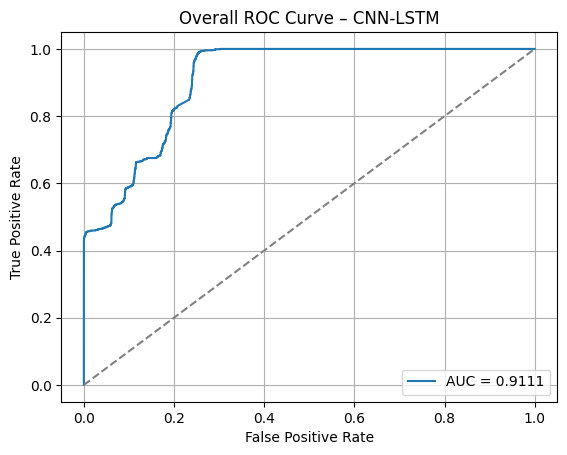

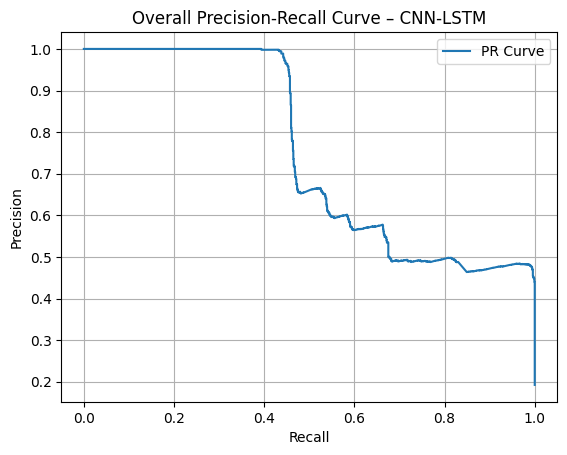

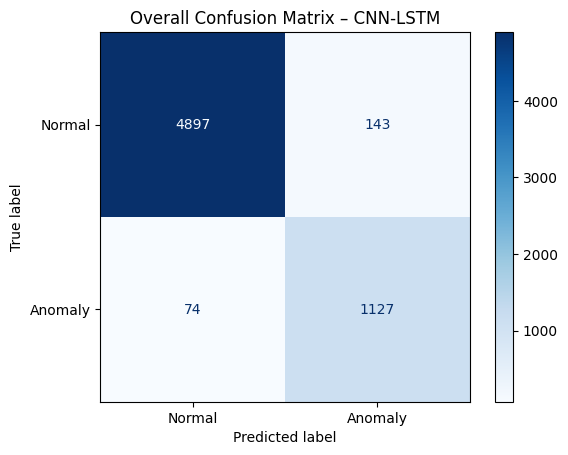

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


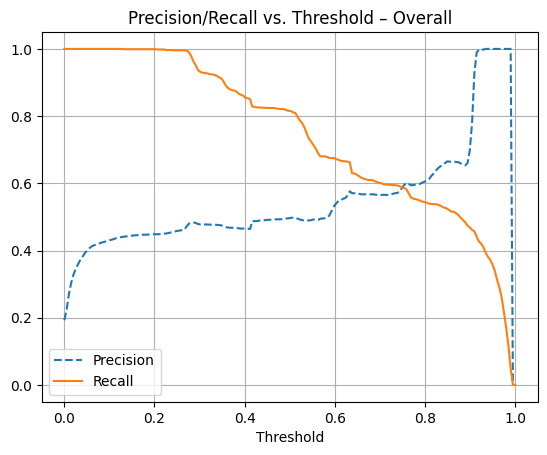

In [ ]:
#Gülseren Merve Şafak
#u314441
# Mounting Google Drive and setting working paths
# I keep my dataset zipped in my Drive, so I unpack it here manually.
# These contain the telemetry .npy files and anomaly label CSV

from google.colab import drive
import os, zipfile, shutil

drive.mount('/content/drive', force_remount=True)
drive_path = '/content/drive/MyDrive/Colab Notebooks'



# I create a local folder called /content/data to extract the .npy files into
os.makedirs('/content/data', exist_ok=True)

# Unzip the telemetry .npy files archive if it exists
data_zip = os.path.join(drive_path, 'data.zip')
if os.path.isfile(data_zip):
    print(" Extracting the data...")
    with zipfile.ZipFile(data_zip, 'r') as archive:
        archive.extractall('/content/data')

# Unzip the labeled anomalies CSV if present
labels_zip = os.path.join(drive_path, 'labeled_anomalies.csv.zip')
if os.path.isfile(labels_zip):
    print(" Extracting labels CSV...")
    with zipfile.ZipFile(labels_zip, 'r') as archive:
        archive.extractall('/content')

# When I unzip the data, it ends up under /content/data/data because the folder inside the ZIP is also named 'data'
# This creates an extra level I don’t need. So I move all .npy files one level up to /content/data
# That way, my later code can just load files from /content/data without checking subfolders
src_folder = '/content/data/data'
if os.path.isdir(src_folder):
    print(" Flattening 'data' folder into /content/data...")
    for fname in os.listdir(src_folder):
        src_file = os.path.join(src_folder, fname)
        dst_file = os.path.join('/content/data', fname)
        if not os.path.exists(dst_file):
            shutil.move(src_file, dst_file)
    shutil.rmtree(src_folder, ignore_errors=True)

print(" Data preparation complete.")
print("   • Telemetry files → /content/data")
print("   • Labels CSV      → /content/labeled_anomalies.csv")


# Importing the libraries I need for data handling, visualization, model building, and evaluation.
# These cover NumPy, pandas, matplotlib, scikit-learn, TensorFlow, etc.

import ast, json, random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report, precision_score, recall_score, f1_score,
    roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay,
    precision_recall_curve
)
from sklearn.utils.class_weight import compute_class_weight

import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# These are the layers I used for my CNN-LSTM hybrid model
from tensorflow.keras.layers import (
    Input, Conv1D, BatchNormalization, MaxPooling1D, Dropout,
    LSTM, Dense
)
from tensorflow.keras.models import Model


# I'm setting fixed random seeds so that things like train/test splits and model training
# produce the same results every time I run the code. This is important for debugging and for
# comparing models fairly without randomness affecting the outcome. https://stackoverflow.com/questions/73597930/usage-of-seed-in-python-random-module
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)


# I implemented this based on the focal loss from the RetinaNet paper (Lin et al., 2017)
# It helped with the class imbalance issue — regular BCE was ignoring the anomaly class.
# I also checked how others did it on StackOverflow: https://stackoverflow.com/questions/66109656/question-regarding-focal-loss-function-implementation
# and adjusted it for binary classification using Keras backend functions.

def focal_loss(gamma=2.0, alpha=0.25):
    """
    Focal Loss for binary classification: down-weights well-classified examples
    so the model focuses on hard, misclassified ones.
    """
    def loss_fn(y_true, y_pred):
        y_true = tf.cast(y_true, tf.float32)
        eps = K.epsilon()
        y_pred = K.clip(y_pred, eps, 1. - eps)
        # applied standard cross-entropy https://stackoverflow.com/questions/49480344/understanding-cross-entropy-loss
        ce = -y_true * K.log(y_pred) - (1 - y_true) * K.log(1 - y_pred)
        # p_t is the model's probability for the true class
        p_t = y_true * y_pred + (1 - y_true) * (1 - y_pred)
        modulator = K.pow(1. - p_t, gamma)
        alpha_weight = y_true * alpha + (1 - y_true) * (1 - alpha)
        return K.mean(alpha_weight * modulator * ce, axis=-1)
    return loss_fn

# This function reads in the labeled anomalies CSV and filters it for just MSL channels
# since the dataset includes both SMAP and MSL spacecraft and I am only using the MSL data.
# Then I loop through each entry, and only keep it if its .npy file exists and covers at least
# one anomaly interval. This helps avoid training on empty or irrelevant data.
# I wanted to make sure each channel has both data and usable labels before moving forward.

def load_msl_channels_with_anomalies(csv_path, data_dir):
    #https://stackoverflow.com/questions/56174378/extract-part-of-the-data-from-a-csv-file-using-python/56174843
    df = pd.read_csv(csv_path)
    df = df[df.spacecraft == 'MSL'].reset_index(drop=True)
    channels = []
    for _, row in df.iterrows():
        chan = row.chan_id
        intervals = ast.literal_eval(row.anomaly_sequences)
        npy_path = os.path.join(data_dir, f"{chan}.npy")
        if not os.path.isfile(npy_path):
            continue
        ts = np.load(npy_path)
        # I keep the channel if at least one anomaly start before end of time-series
        if any(start < ts.shape[0] for (start, _) in intervals):
            channels.append({'chan_id': chan, 'path': npy_path, 'intervals': intervals})
    return channels


# I used this function to create labeled training samples from the time series.
# I slide a window of fixed size (100 steps) across the entire sequence, and assign a label of 1
# if that window overlaps with any known anomaly interval.
# This way, I turn continuous telemetry into supervised samples that can be used by a classifier.

def create_windows(ts, intervals, window_size):
    """
    Slide a window of length `window_size` over the time-series ts,
    label each window as 1 if it overlaps any anomaly interval.
    """
    n = ts.shape[0]
    # ensure shape (T, features)
    feats = ts.shape[1] if ts.ndim > 1 else 1
    X, y = [], []
    for start in range(n - window_size + 1):
        window = ts[start:start + window_size]
        if ts.ndim == 1:
            window = window.reshape(window_size, 1)
        # label = 1 if window overlaps anomaly
        label = int(any(start < end and start + window_size > begin
                        for (begin, end) in intervals))
        X.append(window)
        y.append(label)
    if not X:
        return np.empty((0, window_size, feats)), np.empty((0,), int)
    return np.stack(X), np.array(y, dtype=int)


# I built this model specifically for detecting anomalies in telemetry time series.
# The idea is to first extract local patterns from the raw signal using CNN layers,
# then use an LSTM to model how those patterns evolve over time.
# This combination helps the model detect both signal shapes and their temporal changes.
def build_cnn_lstm(input_shape):

    inp = Input(shape=input_shape, name="input_timeseries")


# First convolutional block
# I start with 64 filters and a kernel size of 5 to learn basic local features in the signal —
# things like small spikes, dips, or repeating shapes.
# https://stackoverflow.com/questions/69612166/i-have-seen-many-cnns-using-number-of-filters-such-as-these8-16-32-64-128-256-5
    x = Conv1D(64, 5, padding='same', activation='relu', name="conv1")(inp)
    x = BatchNormalization(name="bn1")(x)# BatchNorm helps reduce internal covariate shift and speeds up training
    x = MaxPooling1D(2, name="pool1")(x)# I reduce temporal resolution with pooling so the model focuses on important features, not every step
    x = Dropout(0.3, name="drop1")(x) # I add dropout to avoid overfitting since anomalies are rare

# Second convolutional block
# I increase to 128 filters so the model can learn more complex features built on top of the previous ones
    x = Conv1D(128, 5, padding='same', activation='relu', name="conv2")(x)
    x = BatchNormalization(name="bn2")(x)
    x = MaxPooling1D(2, name="pool2")(x)
    x = Dropout(0.3, name="drop2")(x)

# Third convolutional block
# I use smaller filters here (kernel size 3) and more filters (256) to capture even finer patterns
    x = Conv1D(256, 3, padding='same', activation='relu', name="conv3")(x)
    x = BatchNormalization(name="bn3")(x)
    x = MaxPooling1D(2, name="pool3")(x)
    x = Dropout(0.3, name="drop3")(x)

# LSTM layer https://stackoverflow.com/questions/38714959/understanding-keras-long-short-term-memories-lstms
    # After extracting spatial features, I feed them into an LSTM to learn the temporal behavior —
    # in other words, how those features evolve over time.
    # This is important because faults are usually not just one spike, but a pattern across time.
    x = LSTM(64, name="lstm")(x)
    x = Dropout(0.5, name="drop_lstm")(x)# Higher dropout here to regularize sequence learning

# Fully connected dense layer
# This combines everything the model has learned so far and lets it form a decision
    x = Dense(128, activation='relu', name="dense1")(x)
    x = Dropout(0.5, name="drop_dense")(x)

# Output layer
# One neuron with sigmoid activation → outputs a probability for the "anomaly" class
    out = Dense(1, activation='sigmoid', name="output")(x)

    model = Model(inputs=inp, outputs=out, name="CNN_LSTM_Hybrid")

# I used Adam optimizer with a small learning rate for stability https://stackoverflow.com/questions/71185171/understand-adam-optimizer-intuitively
# and focal loss to deal with the severe class imbalance
# I track precision, recall, AUC, and PR-AUC because they're more informative than accuracy here
    metrics = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        tf.keras.metrics.AUC(name='auc'),
        tf.keras.metrics.AUC(name='prc', curve='PR')
    ]
    model.compile(
        optimizer=tf.keras.optimizers.Adam(1e-3),
        loss=focal_loss(),
        metrics=metrics
    )

    model.summary()# I print the model to double-check the architecture and total parameters
    return model


# These functions are for generating plots that help me evaluate the model visually.
# I used these to spot signs of overfitting, check classification quality, and choose thresholds.

def plot_loss_curve(history, channel, tag): # I plotted training and validation loss to check whether the model is overfitting
    plt.figure()
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title(f"{channel} • {tag} Loss")
    plt.xlabel('Epoch'); plt.ylabel('Loss')
    plt.legend(); plt.grid(True)
    os.makedirs(f"plots/{channel}", exist_ok=True)
    plt.savefig(f"plots/{channel}/loss_{tag}.png", dpi=300)
    plt.close()

def plot_roc_curve(y_true, y_prob, channel, tag):# This shows how well the model separates anomalies from normal points across all thresholds
    fpr, tpr, _ = roc_curve(y_true, y_prob) #https://stackoverflow.com/questions/59519995/roc-curve-and-precision-recall-curve#:~:text=ROC%20Curves%20summarize%20the%20trade,value%20using%20different%20probability%20thresholds.
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC={roc_auc:.2f}")
    plt.plot([0,1],[0,1],'--')
    plt.title(f"{channel} • {tag} ROC")
    plt.xlabel('FPR'); plt.ylabel('TPR')
    plt.legend(); plt.grid(True)
    os.makedirs(f"plots/{channel}", exist_ok=True)
    plt.savefig(f"plots/{channel}/roc_{tag}.png", dpi=300)
    plt.close()

def plot_conf_matrix(y_true, y_pred, channel, tag):# Confusion matrix helps me see false positives and false negatives clearly
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=['Normal','Anomaly'])
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f"{channel} • {tag} Confusion Matrix")
    os.makedirs(f"plots/{channel}", exist_ok=True)
    plt.savefig(f"plots/{channel}/conf_matrix_{tag}.png", dpi=300)
    plt.close()

def plot_precision_recall_vs_threshold(y_true, y_prob, channel): # I used this to visualize how changing the threshold affects precision and recall
    p, r, thresholds = precision_recall_curve(y_true, y_prob)
    plt.figure(figsize=(8,4))
    plt.plot(thresholds, p[:-1], '--', label='Precision')
    plt.plot(thresholds, r[:-1], '-', label='Recall')
    plt.xlabel('Threshold'); plt.legend()
    plt.title(f"{channel} • Precision/Recall vs Threshold")
    os.makedirs(f"plots/{channel}", exist_ok=True)
    plt.savefig(f"plots/{channel}/precision_recall_threshold.png", dpi=300)
    plt.close()



def main():
    csv_path  = '/content/labeled_anomalies.csv'
    data_dir  = '/content/data'
    window_size = 100# I use the same window size across models for consistency

    # Loading all MSL channels that have anomaly labels
    channels = load_msl_channels_with_anomalies(csv_path, data_dir)
    print(f" Found {len(channels)} channels with anomalies.")

    # These lists collect all predictions and ground truth values for the final evaluation
    all_y_true, all_y_pred, all_y_prob = [], [], []
    precisions, recalls, f1s, fps, fns = [], [], [], [], []

    for ch in channels:
        chan_id, path, intervals = ch['chan_id'], ch['path'], ch['intervals']
        ts = np.load(path)
        print(f"\n▶ Channel {chan_id} – intervals: {len(intervals)}")

        # Converting the full time series into overlapping windows, each labeled as anomaly or not
        X, y = create_windows(ts, intervals, window_size)
        print(f"   • Windows: {X.shape[0]}, Anomalies: {y.sum()} ({y.mean()*100:.2f}%)")
        if X.size == 0:
            continue

        # # I split the dataset into 70% training and 30% temp (for validation + test), while keeping the class balance using stratify.
        # Then I split that 30% in half to get 15% validation and 15% test.
        # This way, the test set stays completely unseen, and I can use validation to tune the model and select the best threshold.
        X_train, X_tmp, y_train, y_tmp = train_test_split(
            X, y, test_size=0.3, stratify=y, random_state=SEED
        )
        X_val, X_test, y_val, y_test = train_test_split(
            X_tmp, y_tmp, test_size=0.5, stratify=y_tmp, random_state=SEED
        )

        # I used class_weight='balanced' based on this post: https://stackoverflow.com/questions/69783897/compute-class-weight-function-issue-in-sklearn-library-when-used-in-keras-cl
        # It helped the model take anomalies more seriously instead of just predicting normal all the time.
        cw = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
        class_weight = {0: cw[0], 1: cw[1]}
        print(f"   • Class weights: {class_weight}")

        # Clearing previous TensorFlow graph and I build a fresh model
        tf.keras.backend.clear_session()
        model = build_cnn_lstm((window_size, X.shape[2]))
        # EarlyStopping to prevent overfitting, and Checkpoint to save best model
        es = EarlyStopping(monitor='val_prc', patience=5, mode='max', restore_best_weights=True)
        ckpt = ModelCheckpoint(f"models/{chan_id}_best.h5", monitor='val_prc',
                               save_best_only=True, mode='max', verbose=1)

        #Training the model
        history = model.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            epochs=50, batch_size=32,
            class_weight=class_weight,
            callbacks=[es, ckpt],
            verbose=1
        )


        # Loading best weights and predict on test set
        model.load_weights(f"models/{chan_id}_best.h5")
        y_prob = model.predict(X_test).ravel()

        # Using precision-recall curve to find the best threshold for classification
        #https://stackoverflow.com/questions/65975815/plotting-threshold-precision-recall-curve-matplotlib-sklearn-metrics
        p, r, thresh = precision_recall_curve(y_test, y_prob)
        f1_scores = 2*p*r/(p+r+1e-6)
        best_idx = np.argmax(f1_scores)
        best_thr = thresh[best_idx]
        y_pred = (y_prob > best_thr).astype(int)
        print(f"   • Optimal threshold = {best_thr:.4f}")
        print(classification_report(y_test, y_pred, digits=4))

        # Plotingt precision/recall vs threshold
        plot_precision_recall_vs_threshold(y_test, y_prob, chan_id)

        # Saving model predictions to a compressed file
        os.makedirs('outputs', exist_ok=True)
        np.savez_compressed(f"outputs/{chan_id}_pred.npz",
                            y_true=y_test, y_pred=y_pred, y_prob=y_prob)

        # Save model predictions to a compressed file
        plot_loss_curve(history, chan_id, 'final')
        plot_roc_curve(y_test, y_prob, chan_id, 'final')
        plot_conf_matrix(y_test, y_pred, chan_id, 'final')

        # Collect per-channel metrics
        cm = confusion_matrix(y_test, y_pred).ravel()
        tp, fp_, tn, fn_ = cm[3], cm[1], cm[0], cm[2]
        precisions.append(precision_score(y_test, y_pred))
        recalls.append(recall_score(y_test, y_pred))
        f1s.append(f1_score(y_test, y_pred))
        fps.append(int(fp_)); fns.append(int(fn_))
        all_y_true.extend(y_test); all_y_pred.extend(y_pred); all_y_prob.extend(y_prob)



    # Overall on all windows for to analyze
    overall_prec = precision_score(all_y_true, all_y_pred)
    overall_rec  = recall_score(all_y_true, all_y_pred)
    overall_f1   = f1_score(all_y_true, all_y_pred)
    fpr, tpr, _  = roc_curve(all_y_true, all_y_prob)
    overall_auc  = auc(fpr, tpr)

    print("\n Overall Performance:")
    print(f"  • Precision: {overall_prec:.4f}")
    print(f"  • Recall   : {overall_rec:.4f}")
    print(f"  • F1 Score : {overall_f1:.4f}")
    print(f"  • ROC AUC  : {overall_auc:.4f}")

    # Save overall summary
    summary = {
        'precision': overall_prec, 'recall': overall_rec,
        'f1_score': overall_f1,   'roc_auc': overall_auc
    }
    with open('outputs/overall_summary.json', 'w') as f:
        json.dump(summary, f, indent=2)

    #Plotting the overall plots to analyze the results better
    fpr, tpr, _ = roc_curve(all_y_true, all_y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
    plt.plot([0, 1], [0, 1], '--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Overall ROC Curve – CNN-LSTM')
    plt.legend()
    plt.grid(True)
    os.makedirs("plots/overall", exist_ok=True)
    plt.show()
    plt.savefig("plots/overall/roc_overall.png", dpi=300)
    plt.close()

    # Overall PR curve https://stackoverflow.com/questions/59519995/roc-curve-and-precision-recall-curve#:~:text=ROC%20Curves%20summarize%20the%20trade,value%20using%20different%20probability%20thresholds.
    precision, recall, _ = precision_recall_curve(all_y_true, all_y_prob)

    plt.figure()
    plt.plot(recall, precision, label='PR Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Overall Precision-Recall Curve – CNN-LSTM')
    plt.grid(True)
    plt.legend()
    plt.show()
    plt.savefig("plots/overall/prc_overall.png", dpi=300)
    plt.close()

    # Overall confusion matrix
    cm = confusion_matrix(all_y_true, all_y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Anomaly'])

    disp.plot(cmap='Blues', values_format='d')
    plt.title('Overall Confusion Matrix – CNN-LSTM')
    plt.show()
    plt.savefig("plots/overall/conf_matrix_overall.png", dpi=300)
    plt.close()


    # Precision and recall vs threshold curve
    thresholds = np.linspace(0, 1, 200)
    precisions = []
    recalls = []

    for t in thresholds:
      preds = (np.array(all_y_prob) > t).astype(int)
      precisions.append(precision_score(all_y_true, preds))
      recalls.append(recall_score(all_y_true, preds))

    plt.figure()
    plt.plot(thresholds, precisions, label="Precision", linestyle='--')
    plt.plot(thresholds, recalls, label="Recall")
    plt.xlabel("Threshold")
    plt.title("Precision/Recall vs. Threshold – Overall")
    plt.legend()
    plt.grid(True)
    plt.show()
    plt.savefig("plots/overall/threshold_tuning_overall.png", dpi=300)
    plt.close()


if __name__ == '__main__':
    main()
